In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('hotel_booking_data_cleaned.csv')

In [3]:
data.describe

<bound method NDFrame.describe of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27

In [4]:
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix for numeric data only
correlation_matrix = numeric_data.corr()

# Get correlations with 'adr'
adr_correlation = correlation_matrix['adr'].sort_values(ascending=False)



In [14]:
fixed_adr = data.copy(deep=True)
fixed_adr['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [26]:
# dropping 0 and <0
# create a Boolean mask for the rows to remove
mask1 = fixed_adr['adr'] <= 0
mask2 = fixed_adr['adr'] > 1000

# remove masked rows
fixed_adr = fixed_adr[~mask1]
fixed_adr = fixed_adr[~mask2]

fixed_adr[fixed_adr['adr'] <= 0]

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date]
Index: []

In [27]:
# fixed_adr
numeric_data1 = fixed_adr.select_dtypes(include=[np.number])

# Calculate correlation matrix for numeric data only
correlation_matrix1 = numeric_data1.corr()

# Get correlations with 'adr'
adr_correlation1 = correlation_matrix1['adr'].sort_values(ascending=False)

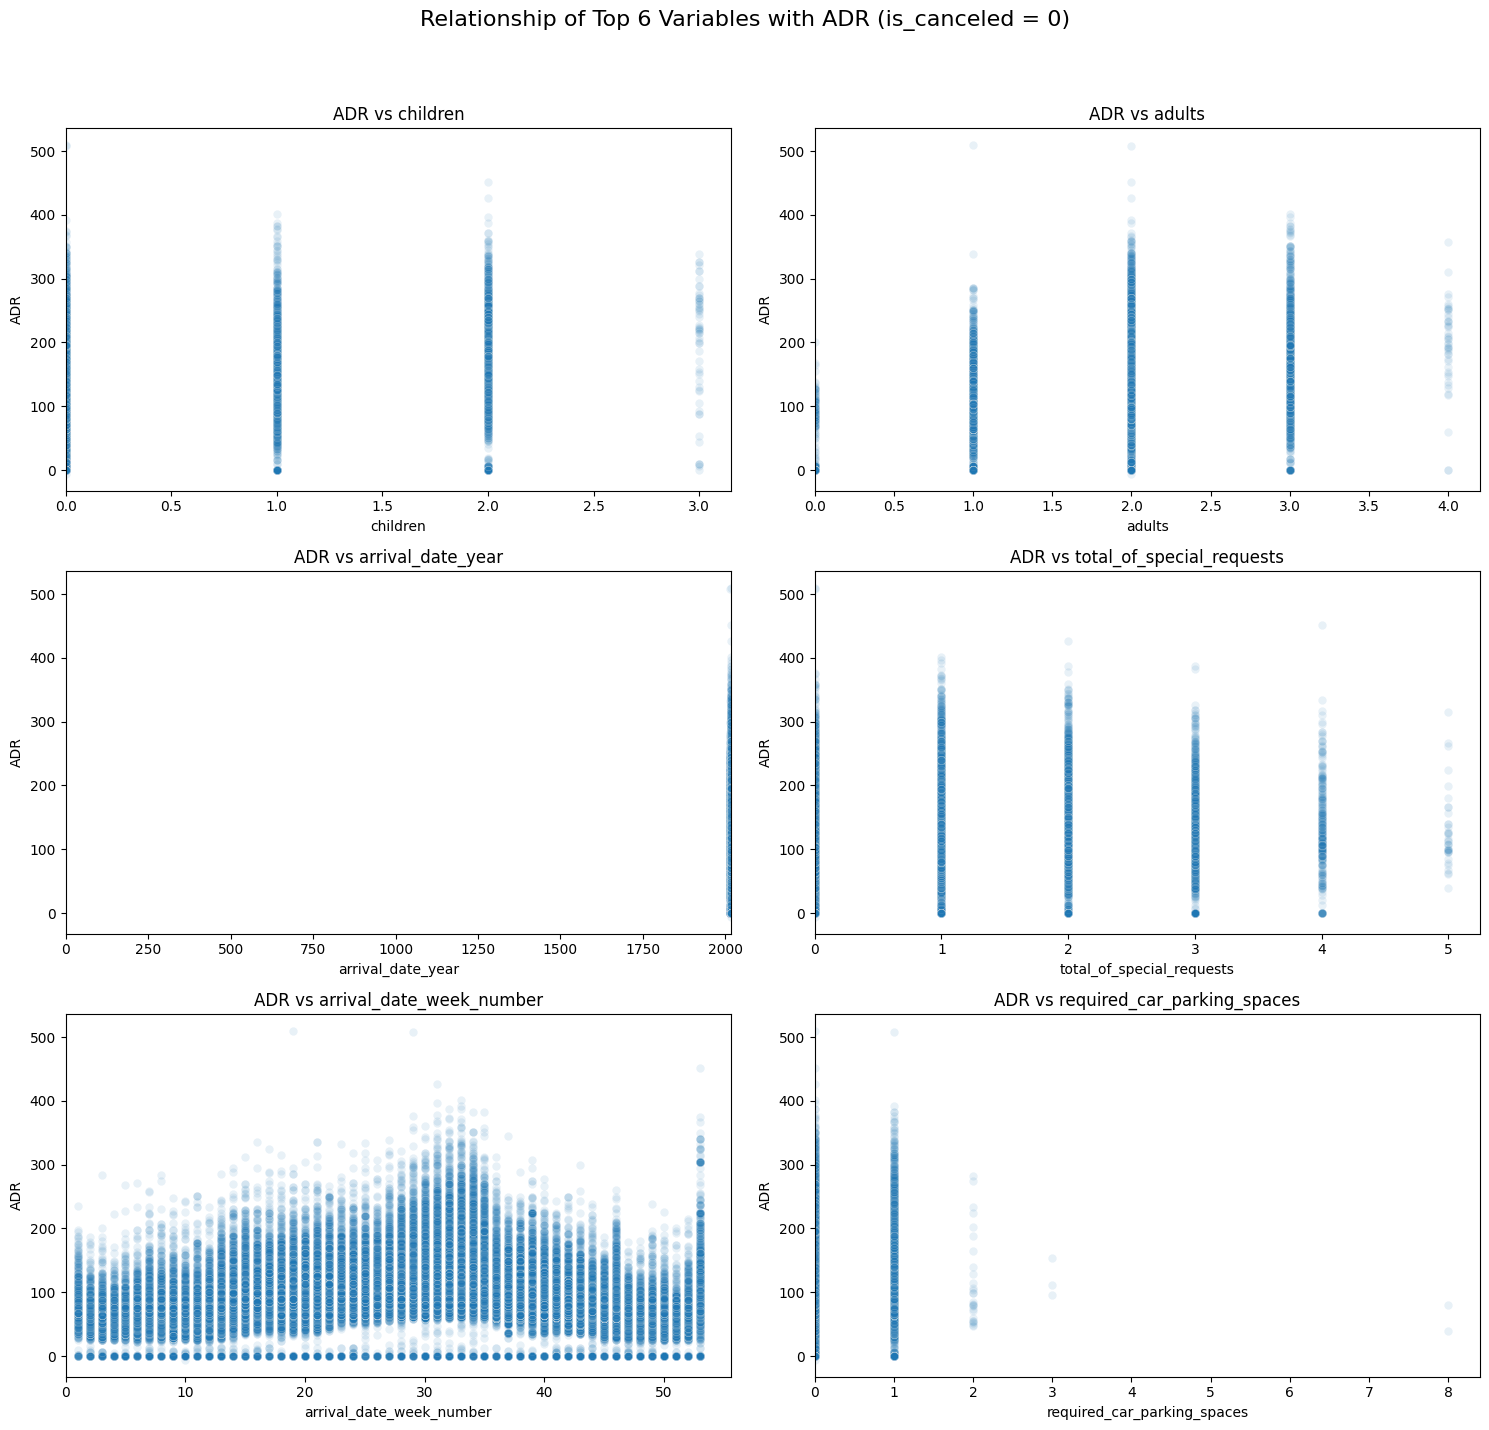

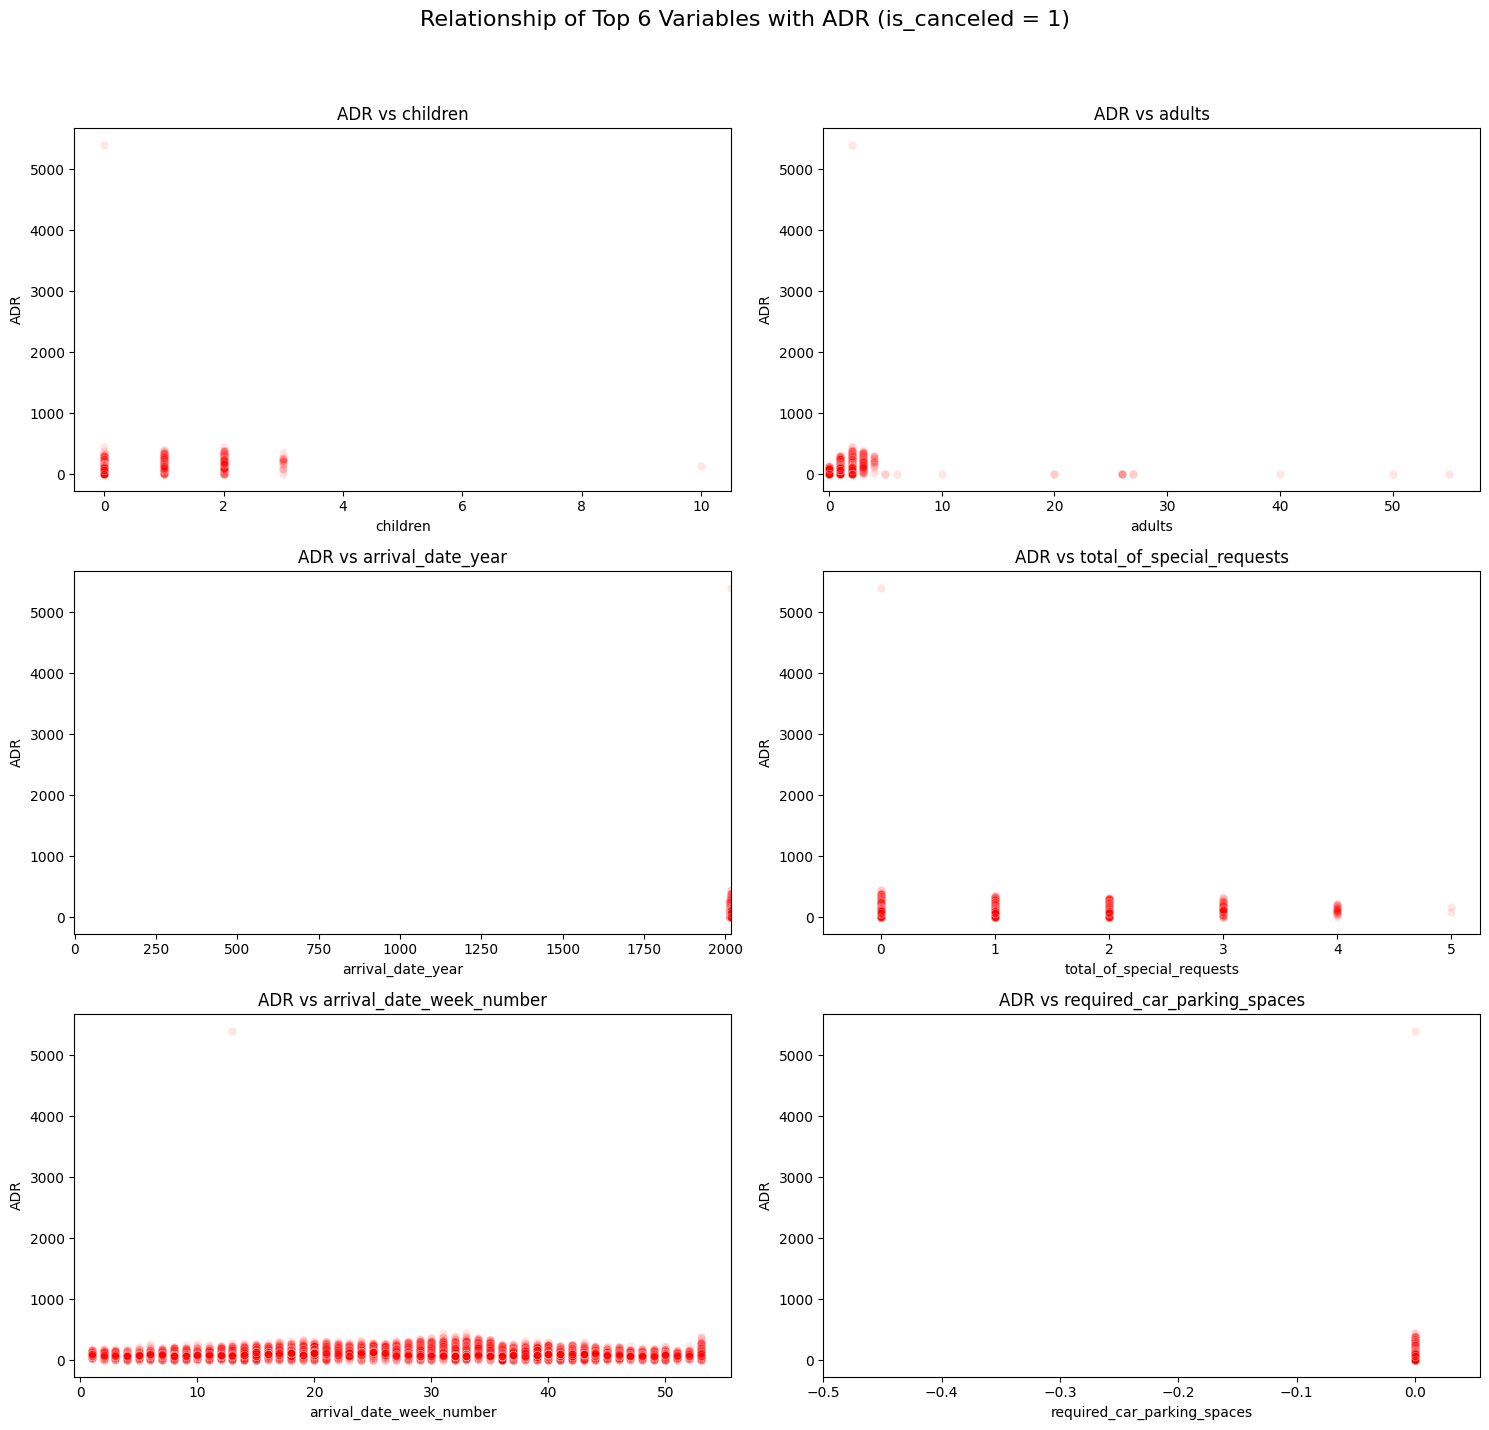

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

top_5_correlated_variables1 = adr_correlation1.drop('adr').head(6).index.tolist()

# Filter data for 'is_canceled' = 0 and 'is_canceled' = 1
data_0 = data[data['is_canceled'] == 0]
data_1 = data[data['is_canceled'] == 1]

# Plotting relationships of top 6 variables with 'adr' for 'is_canceled' = 0
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Relationship of Top 6 Variables with ADR (is_canceled = 0)', fontsize=16)
axes = axes.flatten()  # Flatten to 1D array for easy indexing

for i, var in enumerate(top_5_correlated_variables1):
    sns.scatterplot(ax=axes[i], data=data_0, x=var, y='adr', alpha=0.1)
    axes[i].set_title(f'ADR vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('ADR')
    axes[i].set_xlim(left=0)  # Set x-axis limit to show only positive values

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hide empty subplot (if any)
if len(top_5_correlated_variables1) < len(axes):
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

plt.show()

# Plotting relationships of top 6 variables with 'adr' for 'is_canceled' = 1
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Relationship of Top 6 Variables with ADR (is_canceled = 1)', fontsize=16)
axes = axes.flatten()  # Flatten to 1D array for easy indexing

for i, var in enumerate(top_5_correlated_variables1):
    sns.scatterplot(ax=axes[i], data=data_1, x=var, y='adr', alpha=0.1, color='red')
    axes[i].set_title(f'ADR vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('ADR')
    axes[i].set_xlim(left=-0.5)  # Set x-axis limit to show only positive values

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hide empty subplot (if any)
if len(top_5_correlated_variables1) < len(axes):
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

plt.show()


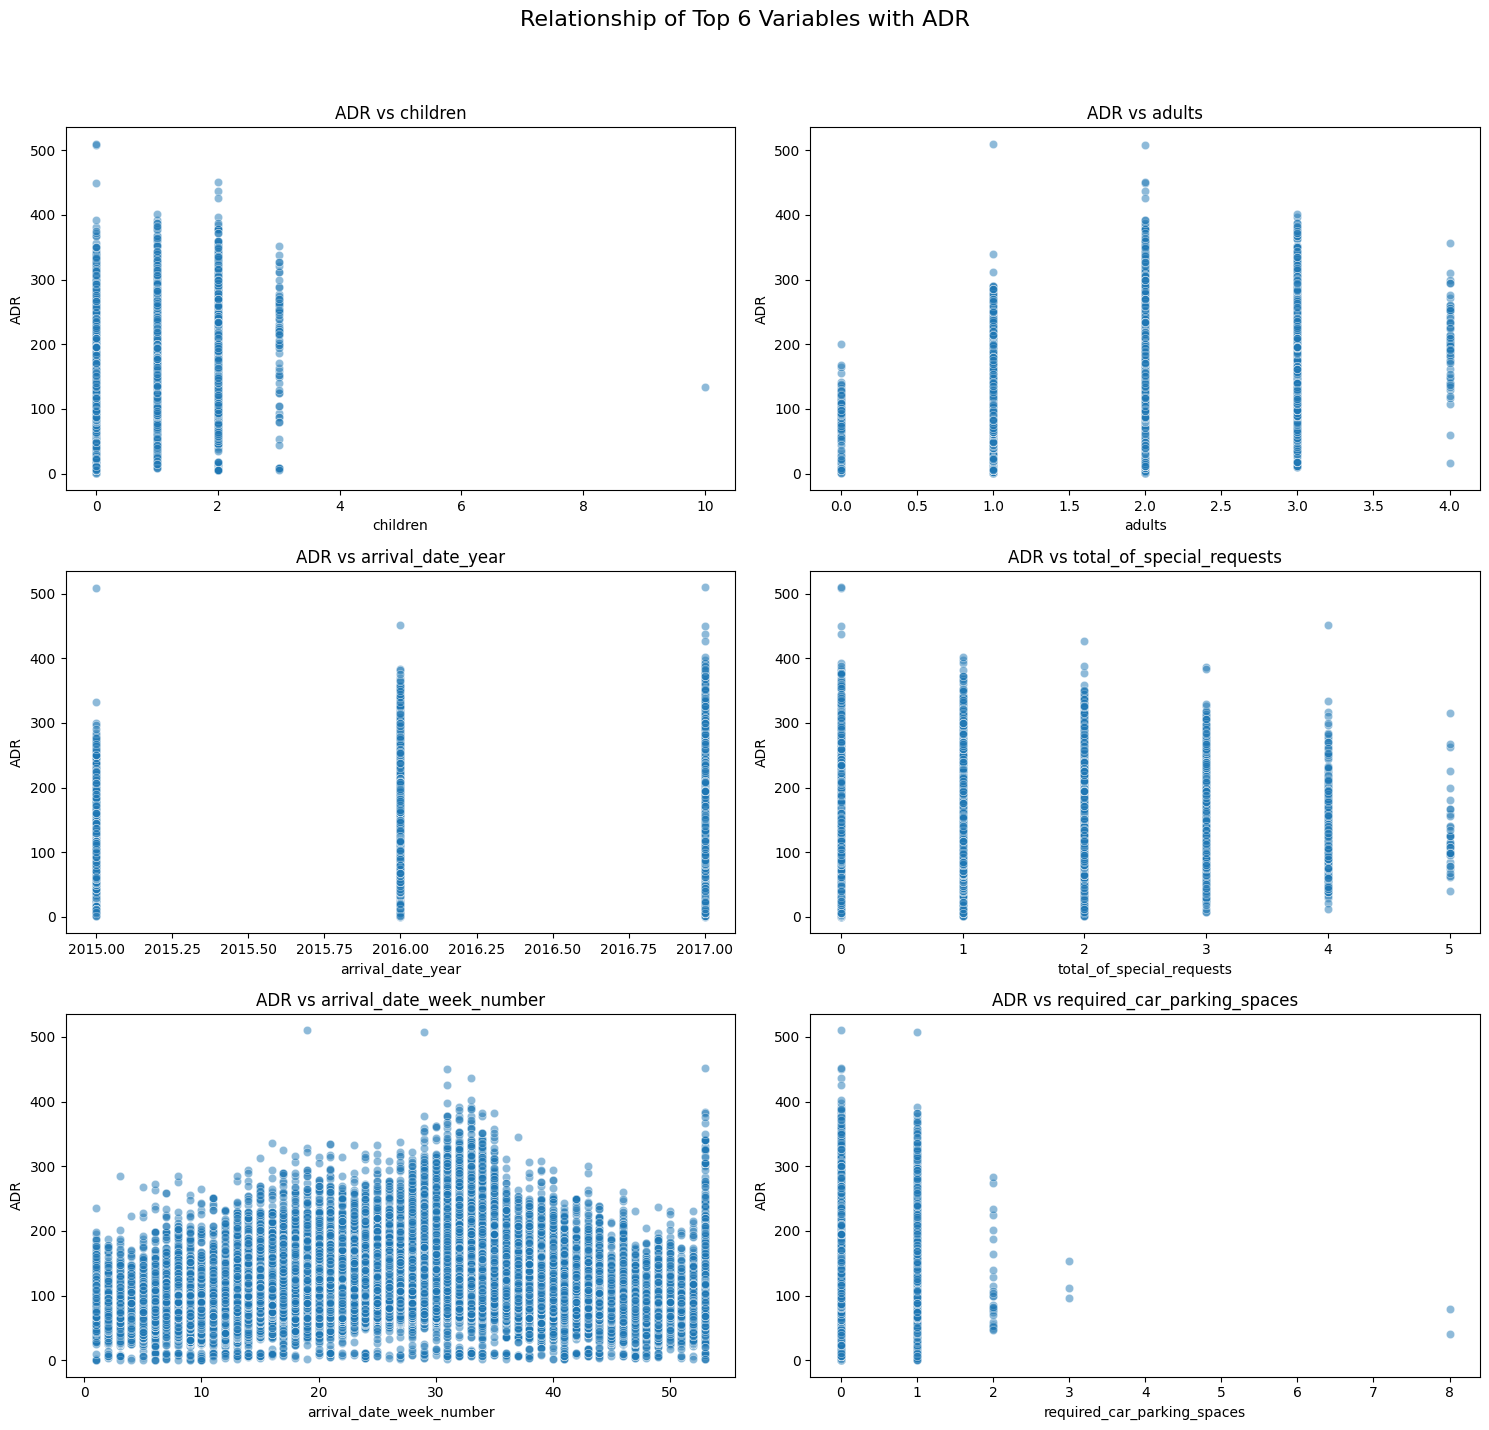

In [49]:
# fixed_adr
import matplotlib.pyplot as plt
import seaborn as sns

top_6_correlated_variables1 = adr_correlation1.drop('adr').head(6).index.tolist()

# Plotting relationships of top 6 variables with 'adr'
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Relationship of Top 6 Variables with ADR', fontsize=16)
axes = axes.flatten()  # Flatten to 1D array for easy indexing

for i, var in enumerate(top_6_correlated_variables1):
    sns.scatterplot(ax=axes[i], data=fixed_adr, x=var, y='adr', alpha=0.5)
    axes[i].set_title(f'ADR vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('ADR')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hide empty subplot (if any)
if len(top_6_correlated_variables1) < len(axes):
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

plt.show()

In [36]:
# check if all adr=0 has cancelled =0
data[ (data['adr']==0) & (data['is_canceled']==0) ].shape, data[ (data['adr']==0) & (data['is_canceled']==1) ].shape, data.shape

((1746, 32), (213, 32), (119390, 32))

In [5]:
adr_correlation

adr                               1.000000
children                          0.324854
adults                            0.230641
arrival_date_year                 0.197580
total_of_special_requests         0.172185
company                           0.086376
arrival_date_week_number          0.075791
stays_in_week_nights              0.065237
required_car_parking_spaces       0.056628
stays_in_weekend_nights           0.049342
is_canceled                       0.047557
arrival_date_day_of_month         0.030245
babies                            0.029186
booking_changes                   0.019618
agent                            -0.024695
days_in_waiting_list             -0.040756
lead_time                        -0.063077
previous_cancellations           -0.065646
previous_bookings_not_canceled   -0.072144
is_repeated_guest                -0.134314
Name: adr, dtype: float64

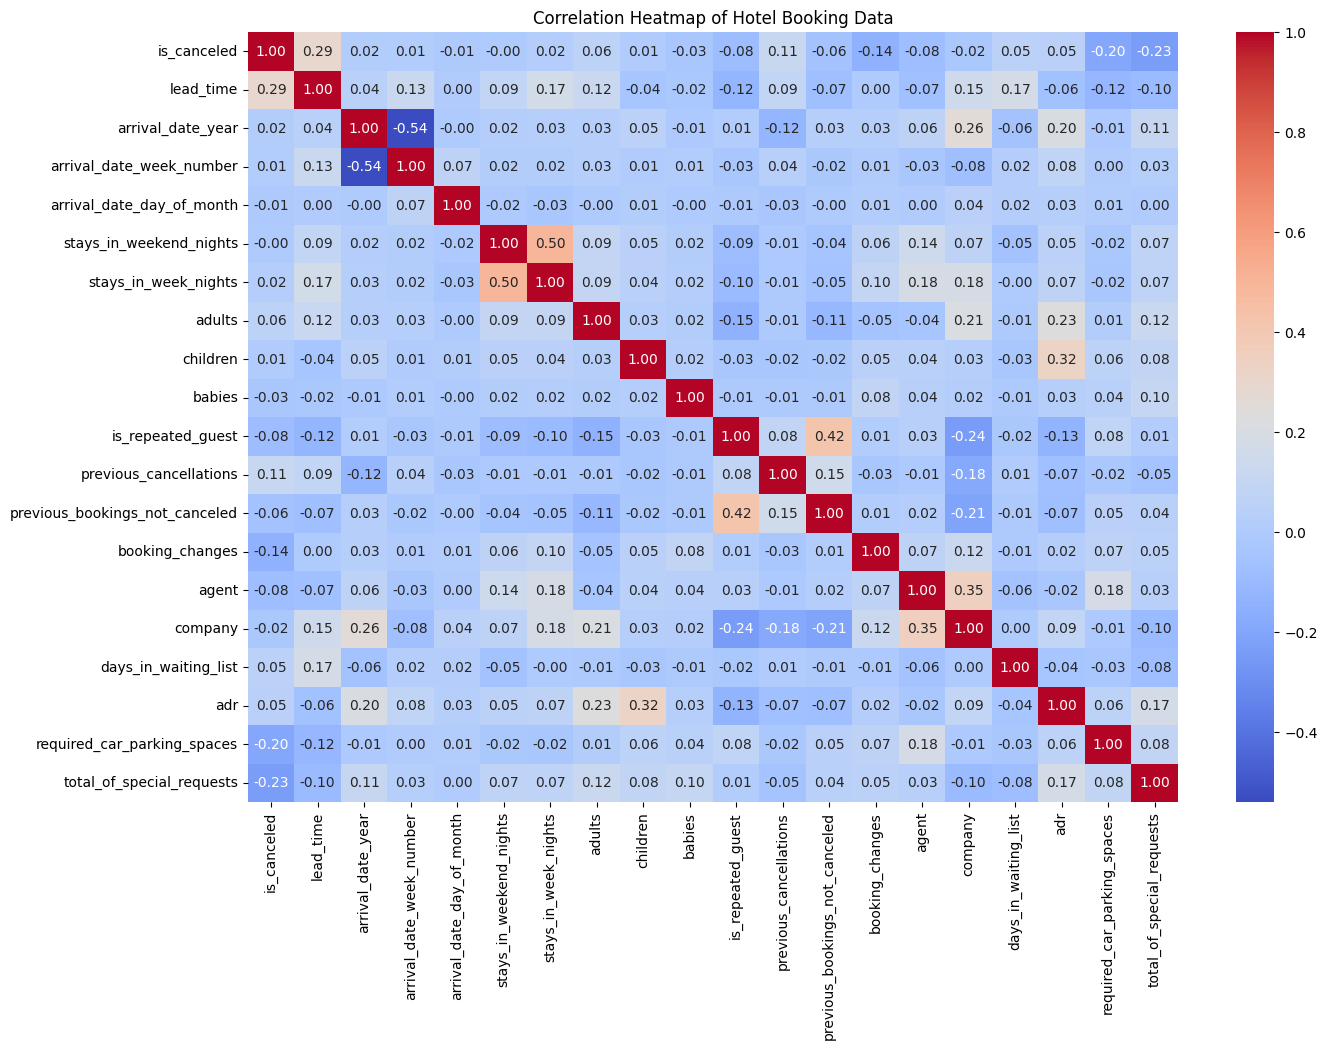

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

corr = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Hotel Booking Data')
plt.show()

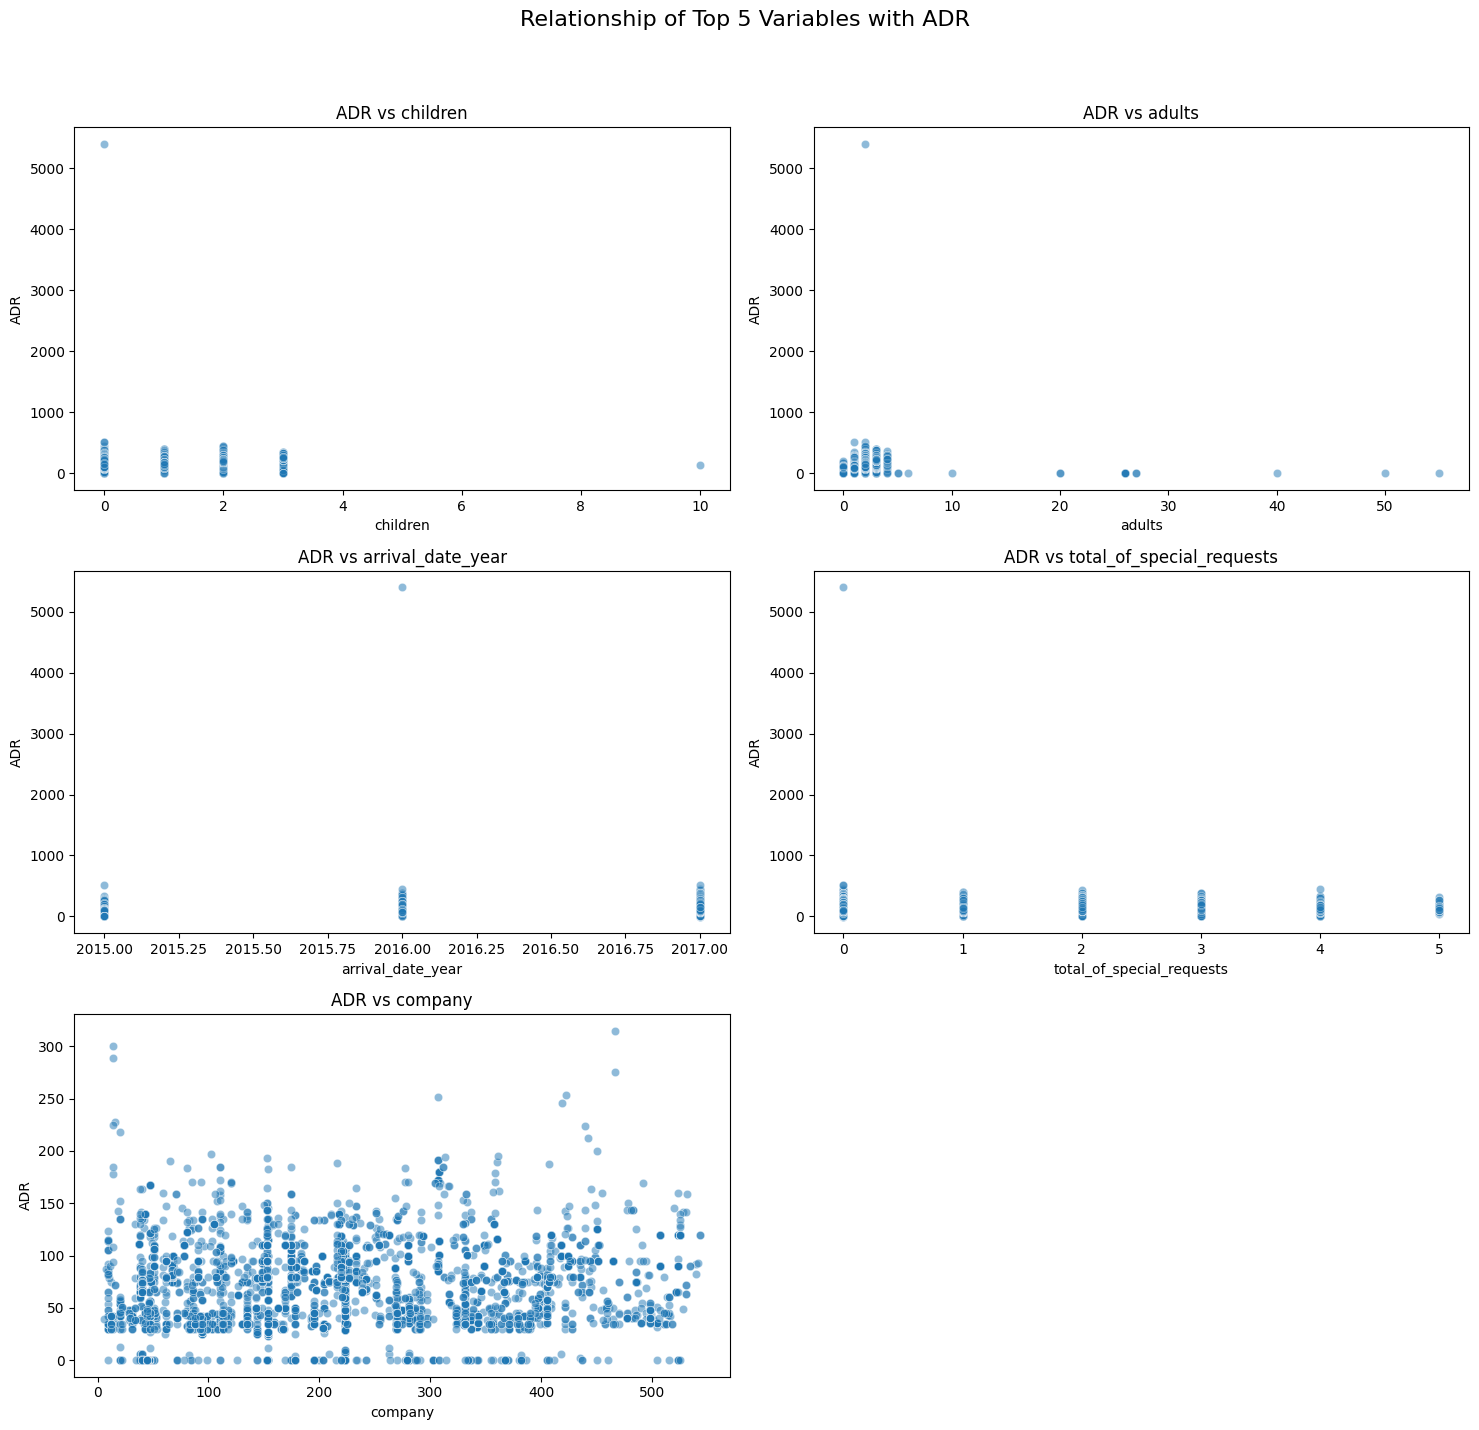

In [49]:
top_5_correlated_variables = adr_correlation.drop('adr').head(5).index.tolist()

# Plotting relationships of top 5 variables with 'adr'
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Relationship of Top 5 Variables with ADR', fontsize=16)
axes = axes.flatten()  # Flatten to 1D array for easy indexing

for i, var in enumerate(top_5_correlated_variables):
    sns.scatterplot(ax=axes[i], data=data, x=var, y='adr', alpha=0.5)
    axes[i].set_title(f'ADR vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('ADR')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hide empty subplot (if any)
if len(top_5_correlated_variables) < len(axes):
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

plt.show()

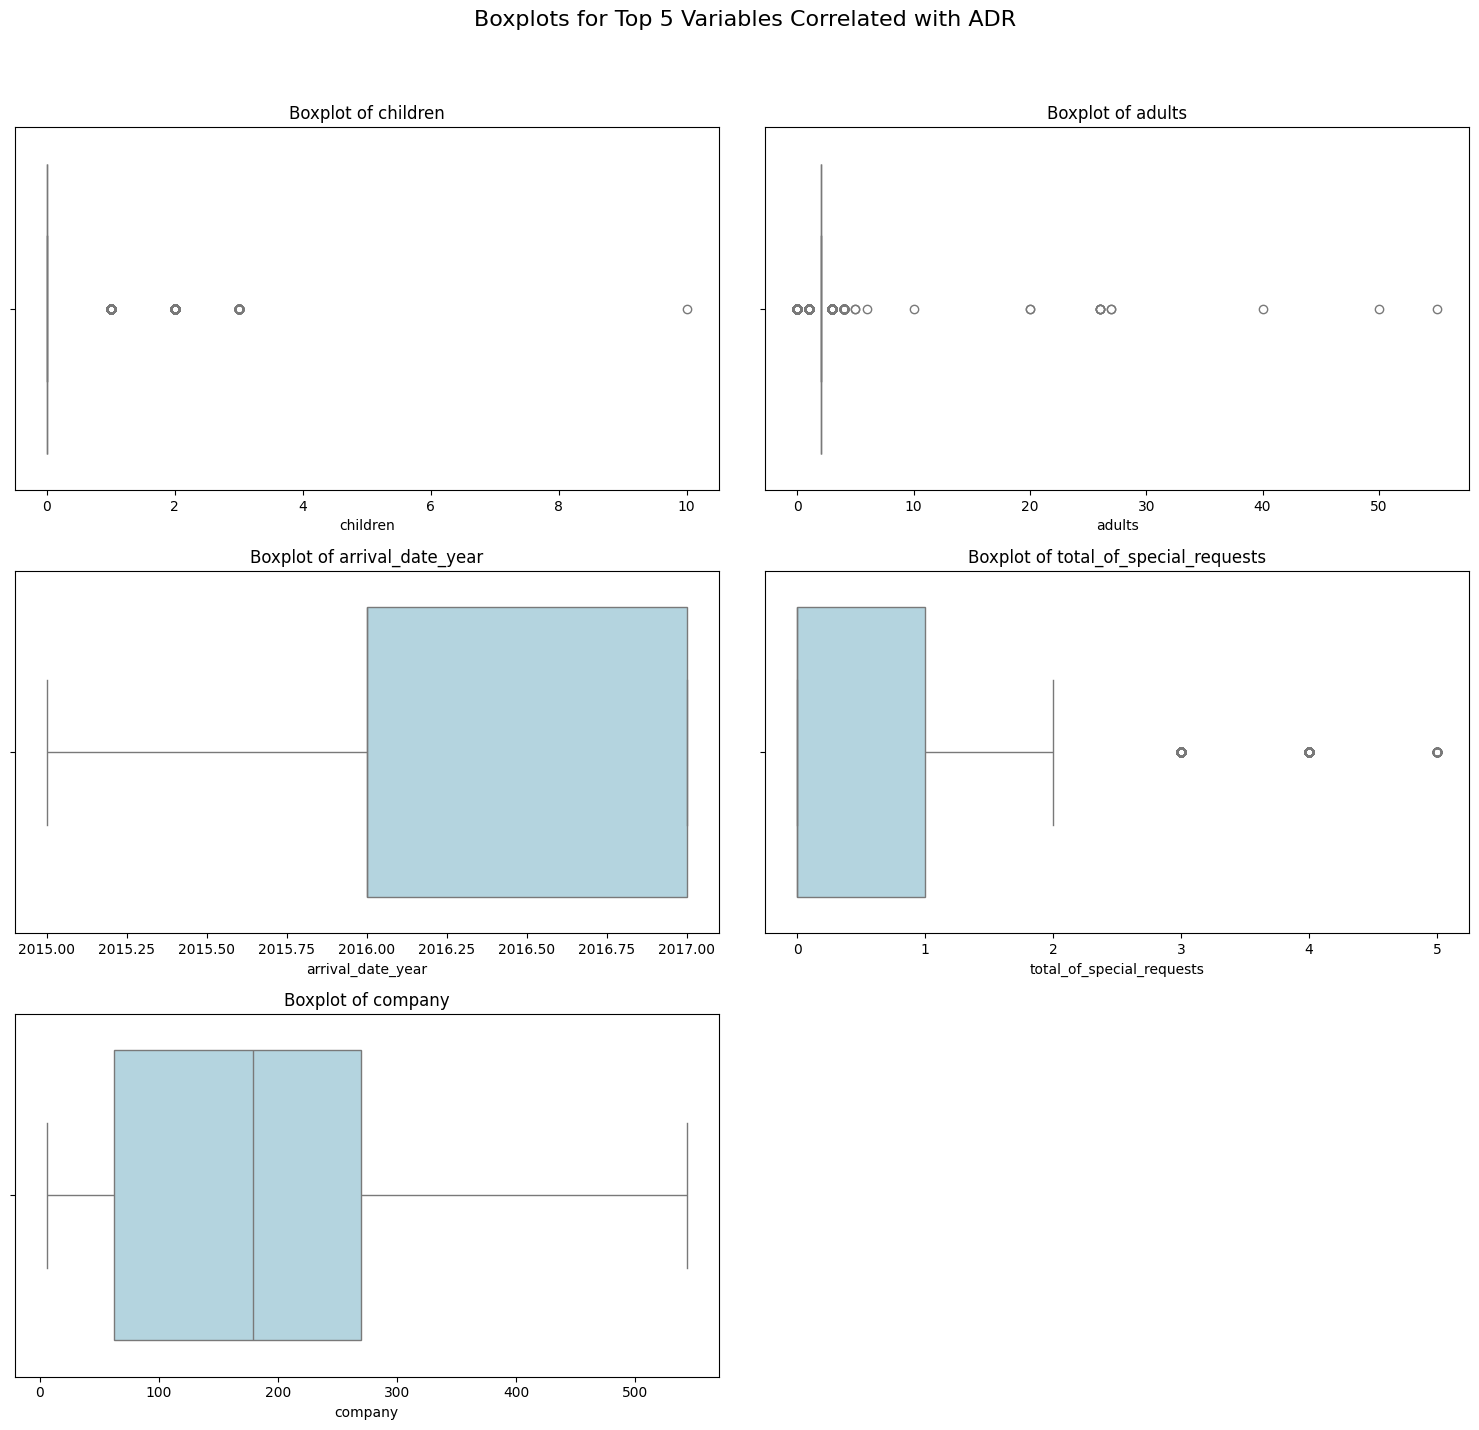

In [50]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Boxplots for Top 5 Variables Correlated with ADR', fontsize=16)
axes = axes.flatten()  # Flatten to 1D array for easy indexing

for i, var in enumerate(top_5_correlated_variables):
    sns.boxplot(ax=axes[i], data=data, x=var, color='lightblue')
    axes[i].set_title(f'Boxplot of {var}')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hide empty subplot (if any)
if len(top_5_correlated_variables) < len(axes):
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

plt.show()

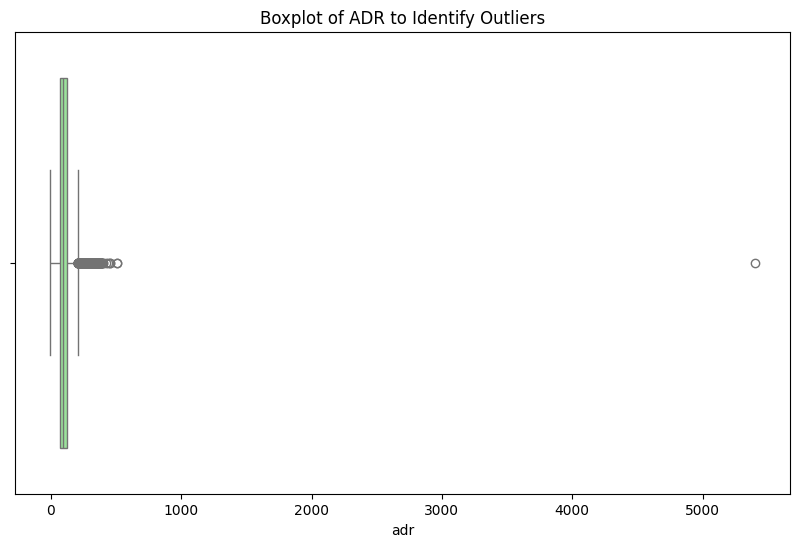

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='adr', color='lightgreen')
plt.title('Boxplot of ADR to Identify Outliers')
plt.show()

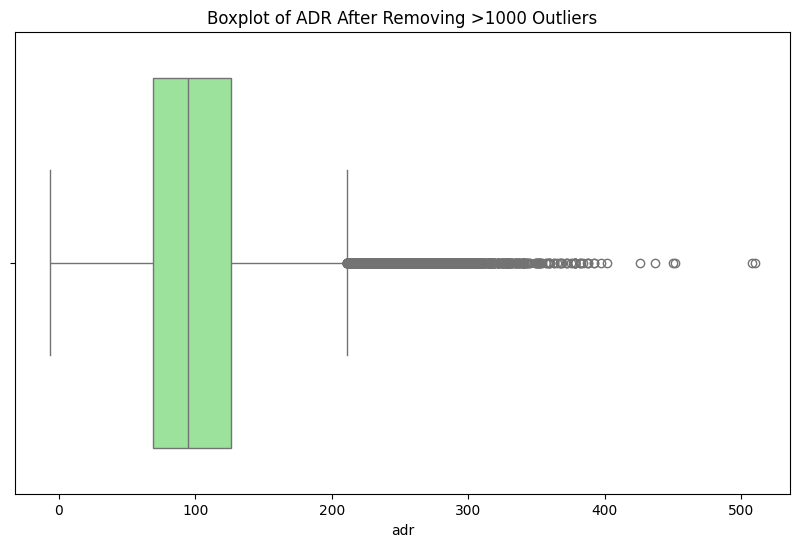

(119389, 32)

In [52]:
filtered_data = data[data['adr'] <= 1000]

# Verify removal by checking the new shape of the dataset
new_shape = filtered_data.shape

# Plotting a new boxplot for ADR after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='adr', color='lightgreen')
plt.title('Boxplot of ADR After Removing >1000 Outliers')
plt.show()

new_shape

In [53]:
filtered_data.loc[:, 'resort'] = (filtered_data['hotel'] == 'Resort Hotel').astype(int)
filtered_data.loc[:, 'city_hotel'] = (filtered_data['hotel'] == 'City Hotel').astype(int)
# Display the first few rows to verify the new columns
filtered_data[['hotel', 'resort', 'city_hotel']].head()
filtered_data = filtered_data.drop('hotel',axis= 1)

/var/folders/b4/nhbrf4ws253b52n__dgvd0gr0000gn/T/ipykernel_79036/791304330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'resort'] = (filtered_data['hotel'] == 'Resort Hotel').astype(int)
/var/folders/b4/nhbrf4ws253b52n__dgvd0gr0000gn/T/ipykernel_79036/791304330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'city_hotel'] = (filtered_data['hotel'] == 'City Hotel').astype(int)


In [54]:
filtered_data

is_canceled  lead_time  arrival_date_year arrival_date_month  \
0                 0        342               2015               July   
1                 0        737               2015               July   
2                 0          7               2015               July   
3                 0         13               2015               July   
4                 0         14               2015               July   
...             ...        ...                ...                ...   
119385            0         23               2017             August   
119386            0        102               2017             August   
119387            0         34               2017             August   
119388            0        109               2017             August   
119389            0        205               2017             August   

        arrival_date_week_number  arrival_date_day_of_month  \
0                             27                          1   
1                             27                          1   
2                             27                          1   
3                             27                          1   
4                             27                          1   
...                          ...                        ...   
119385                        35                         30   
119386                        35                         31   
119387                        35                         31   
119388                        35                         31   
119389                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                             0                     0       2       0.0   
1                             0                     0       2       0.0   
2                             0                     1       1       0.0   
3                             0                     1       1       0.0   
4                             0                     2       2       0.0   
...                         ...                   ...     ...       ...   
119385                        2                     5       2       0.0   
119386                        2                     5       3       0.0   
119387                        2                     5       2       0.0   
119388                        2                     5       2       0.0   
119389                        2                     7       2       0.0   

        babies meal country market_segment distribution_channel  \
0            0   BB     PRT         Direct               Direct   
1            0   BB     PRT         Direct               Direct   
2            0   BB     GBR         Direct               Direct   
3            0   BB     GBR      Corporate            Corporate   
4            0   BB     GBR      Online TA                TA/TO   
...        ...  ...     ...            ...                  ...   
119385       0   BB     BEL  Offline TA/TO                TA/TO   
119386       0   BB     FRA      Online TA                TA/TO   
119387       0   BB     DEU      Online TA                TA/TO   
119388       0   BB     GBR      Online TA                TA/TO   
119389       0   HB     DEU      Online TA                TA/TO   

        is_repeated_guest  previous_cancellations  \
0                       0                       0   
1                       0                       0   
2                       0                       0   
3                       0                       0   
4                       0                       0   
...                   ...                     ...   
119385                  0                       0   
119386                  0                       0   
119387                  0                       0   
119388                  0                       0   
119389                  0                       0   

        previous_bookings_not_canceled rese

In [55]:
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix for numeric data only
correlation_matrix = numeric_data.corr()

# Get correlations with 'adr'
adr_correlation = correlation_matrix['adr'].sort_values(ascending=False)

In [95]:
filtered_data1 = data

pd.set_option('display.max_rows', None)

cancellation_rate_by_country_new = filtered_data1.groupby('country')['adr'].mean().reset_index()
cancellation_rate_by_country_new.columns = ['country', 'adr_by_country']

# Merge this cancellation rate back onto the new dataset
filtered_data1 = pd.merge(filtered_data1, cancellation_rate_by_country_new, on='country', how='left')

# Display the first few rows to verify the new column
filtered_data1[['country', 'adr_by_country']].drop_duplicates().sort_values(by='adr_by_country',ascending=False).head(10)

country  adr_by_country
38478      DJI      273.000000
92807      AIA      265.000000
7143       AND      202.652857
68227      UMI      200.000000
117943     LAO      181.665000
70923      MYT      177.750000
112040     NCL      175.500000
7076       GEO      169.015909
21032      COM      165.305000
72589      FRO      155.200000

In [96]:
cancellation_rate_by_country_new = filtered_data.groupby('country')['is_canceled'].mean().reset_index()
cancellation_rate_by_country_new.columns = ['country', 'cancellation_rate_by_country']

# Merge this cancellation rate back onto the new dataset
filtered_data = pd.merge(filtered_data, cancellation_rate_by_country_new, on='country', how='left')

# Display the first few rows to verify the new column
filtered_data[['country', 'cancellation_rate_by_country']].head()

country  cancellation_rate_by_country
0     PRT                      0.566351
1     PRT                      0.566351
2     GBR                      0.202243
3     GBR                      0.202243
4     GBR                      0.202243

In [58]:
filtered_data = filtered_data.drop(columns=['reservation_status_date'])

In [59]:
filtered_data

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

### FEATURE ENGINEERING / EDA ON is_canceled

In [60]:
filtered_data['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [61]:
filtered_data['is_canceled'].sum() / np.size(filtered_data, 0)

0.37041628277075134

In [62]:
filtered_data['company'].value_counts(dropna=False)

company
NaN      112593
40.0        927
223.0       784
67.0        267
45.0        250
          ...  
32.0          1
11.0          1
487.0         1
101.0         1
376.0         1
Name: count, Length: 353, dtype: int64

In [63]:
filtered_data = filtered_data.drop(columns=['company'])
filtered_data = filtered_data.drop(columns=['children'])
filtered_data = filtered_data.drop(columns=['arrival_date_week_number'])
filtered_data = filtered_data.drop(columns=['required_car_parking_spaces'])
filtered_data = filtered_data.drop(columns=['is_repeated_guest'])
filtered_data = filtered_data.drop(columns=['arrival_date_day_of_month'])
filtered_data = filtered_data.drop(columns=['country'])
filtered_data = filtered_data.drop(columns=['babies'])
filtered_data = filtered_data.drop(columns=['previous_bookings_not_canceled'])
filtered_data = filtered_data.drop(columns=['reservation_status'])


In [64]:
filtered_data['agent'].value_counts(dropna=False)

agent
9.0      31961
NaN      16340
240.0    13922
1.0       7191
14.0      3640
         ...  
280.0        1
285.0        1
289.0        1
265.0        1
497.0        1
Name: count, Length: 334, dtype: int64

In [65]:
#filtered_data = filtered_data.drop(columns=['agent'])

In [66]:
filtered_data = filtered_data.dropna(subset=['cancellation_rate_by_country'])

In [67]:
filtered_data[(filtered_data['children'] == 0.0)]['children'].count() / np.size(filtered_data, 0)

KeyError: 'children'

In [28]:
filtered_data[(filtered_data['children'] == 0.0) & (filtered_data['is_canceled'] == 1)]['is_canceled'].count() / np.size(filtered_data[filtered_data['is_canceled'] == 1], 0)

0.9291165613605997

From the above, we see that children don't have a factor in cancellation as the distribution of is_canceled is spread out along having children equally skewed, so we can drop it.

In [68]:
filtered_data['agent'] = filtered_data['agent'].fillna(0.0)

# Step 2 & 3: Group everything below 1.0 as 'other', and categorize specific IDs
def categorize_agent(agent_id):
    if agent_id == 9.0:
        return '9.0'
    elif agent_id == 0.0:  # This represents the previously NaN values
        return '0.0'
    elif agent_id == 240.0:
        return '240.0'
    else:
        return 'other'  # You could adjust this logic if there are specific IDs you want to keep separate

# Apply the categorization function to the 'agents' column
filtered_data['agent'] = filtered_data['agent'].apply(categorize_agent)

In [69]:
null_counts = filtered_data.isnull().sum()  # Calculate null counts for each column
sorted_null_counts = null_counts.sort_values(ascending=False)  # Sort counts

# Now, print the sorted null counts
print(sorted_null_counts)

hotel                           0
is_canceled                     0
total_of_special_requests       0
adr                             0
customer_type                   0
days_in_waiting_list            0
agent                           0
deposit_type                    0
booking_changes                 0
assigned_room_type              0
reserved_room_type              0
previous_cancellations          0
distribution_channel            0
market_segment                  0
meal                            0
adults                          0
stays_in_week_nights            0
stays_in_weekend_nights         0
arrival_date_month              0
arrival_date_year               0
lead_time                       0
cancellation_rate_by_country    0
dtype: int64


In [70]:
filtered_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'meal', 'market_segment', 'distribution_channel',
       'previous_cancellations', 'reserved_room_type', 'assigned_room_type',
       'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list',
       'customer_type', 'adr', 'total_of_special_requests',
       'cancellation_rate_by_country'],
      dtype='object')

In [37]:
filtered_data['required_car_parking_spaces'].sum() / np.size(filtered_data, 0)

0.061882895157356475

In [39]:
filtered_data[(filtered_data['required_car_parking_spaces'] == 1) & (filtered_data['is_canceled'] == 1)]

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, cancellation_rate_by_country]
Index: []

there are no records of cancelltion with those who required parking. SO dropping the column.

In [48]:
filtered_data[(filtered_data['previous_cancellations'] == 1) & (filtered_data['is_canceled'] == 1)]['is_canceled'].count()

0.9458201761675253

In [47]:
filtered_data[(filtered_data['previous_cancellations'] == 1)]['is_canceled'].count()

6017

people who have a history of cancellations, tend to cancel again. 94.5%. patterns dont lie lol

In [49]:
filtered_data[(filtered_data['is_repeated_guest'] == 1) & (filtered_data['is_canceled'] == 1)]['is_canceled'].count()

552

In [57]:
filtered_canceled = filtered_data[filtered_data['is_canceled'] == 1]

# Group by 'agent' and count the occurrences
filtered_canceled.groupby('agent').size().sort_values(ascending=False)

agent
9.0      13264
240.0     5484
1.0       5280
6.0       1020
19.0       780
         ...  
81.0         1
324.0        1
32.0         1
244.0        1
139.0        1
Length: 217, dtype: int64

In [63]:
filtered_data[(filtered_data['deposit_type'] == 'No Deposit') & (filtered_data['is_canceled'] == 1)]['is_canceled'].count() / np.size(filtered_data[filtered_data['is_canceled']==1], 0)

0.6712638992685191

In [66]:
filtered_data[(filtered_data['deposit_type'] == 'Non Refund') & (filtered_data['is_canceled'] == 1)]['is_canceled'].count() / np.size(filtered_data[filtered_data['deposit_type'] == 'Non Refund'], 0)

0.9936183352775682

In [67]:
filtered_data['deposit_type'].value_counts()

deposit_type
No Deposit    104167
Non Refund     14573
Refundable       162
Name: count, dtype: int64

99% of people who booked as Non-Refund cancelled!

In [69]:
filtered_data[filtered_data['arrival_date_year'] == 2017]['arrival_date_month'].value_counts()

arrival_date_month
May         6313
June        5647
April       5641
July        5313
March       4951
August      4925
February    4155
January     3659
Name: count, dtype: int64

In [71]:
np.size(filtered_data.columns)

22

In [72]:
# Define a mapping of months to seasons
month_to_season = {
    'January': 'Winter',
    'February': 'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'July': 'Summer',
    'August': 'Summer',
    'September': 'Autumn',
    'October': 'Autumn',
    'November': 'Autumn',
    'December': 'Winter'
}

# Map the arrival_date_month to their corresponding seasons
filtered_data['arrival_season'] = filtered_data['arrival_date_month'].map(month_to_season)
filtered_data = filtered_data.drop(columns=['arrival_date_month'])

In [73]:
np.size(pd.get_dummies(filtered_data).columns, 0)

69

In [74]:
def categorize_room_type(room_type):
    if room_type == 'D':
        return 'A'
    elif room_type == 'A':  
        return 'D'
    else:
        return 'other'  

# Apply the categorization function to the 'agents' column
filtered_data['assigned_room_type'] = filtered_data['assigned_room_type'].apply(categorize_agent)

In [128]:
filtered_data.to_csv('test.csv')

In [75]:
filtered_data

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

        stays_in_weekend_nights  stays_in_week_nights  adults meal  \
0                             0                     0       2   BB   
1                             0                     0       2   BB   
2                             0                     1       1   BB   
3                             0                     1       1   BB   
4                             0                     2       2   BB   
...                         ...                   ...     ...  ...   
119385                        2                     5       2   BB   
119386                        2                     5       3   BB   
119387                        2                     5       2   BB   
119388                        2                     5       2   BB   
119389                        2                     7       2   HB   

       market_segment distribution_channel  previous_cancellations  \
0              Direct               Direct                       0   
1              Direct               Direct                       0   
2              Direct               Direct                       0   
3           Corporate            Corporate                       0   
4           Online TA                TA/TO                       0   
...               ...                  ...                     ...   
119385  Offline TA/TO                TA/TO                       0   
119386      Online TA                TA/TO                       0   
119387      Online TA                TA/TO                       0   
119388      Online TA                TA/TO                       0   
119389      Online TA                TA/TO                       0   

       reserved_room_type assigned_room_type  booking_changes deposit_type  \
0                       C              other                3   No Deposit   
1                       C              other                4   No Deposit   
2                       A              other                0   No Deposit   
3                       A              other                0   No Deposit   
4                       A              other                0   No Deposit   
...                   ...                ...              ...          ...   
119385                  A              other                0   No Deposit   
119386                  E              other                0   No Deposit   
119387                  D              other                0   No Deposit   
119388                  A              other                0   No Deposit   
119389                  A              other                0   No Deposit   

        agent  days_in_waiting_list customer_type     adr  \
0         0.0                     0     Transient    0.00   
1         0.0                     0     Transient    0.00   
2         0.0                     0     Transient   75.00   
3       other                     0     Transient   75.00   
4       240.0                     0     Transient   98.00   
...       ...                   ...           ...     ...   
119385  other                     0     Transient   96.14   
119386    9.0                     0     Transient  225.43   
119387    9.0                     0     Tr

In [76]:
dummies = pd.get_dummies(filtered_data)

In [89]:
dummies

is_canceled  lead_time  arrival_date_year  stays_in_weekend_nights  \
2                 0          7               2015                        0   
3                 0         13               2015                        0   
4                 0         14               2015                        0   
5                 0         14               2015                        0   
6                 0          0               2015                        0   
...             ...        ...                ...                      ...   
119385            0         23               2017                        2   
119386            0        102               2017                        2   
119387            0         34               2017                        2   
119388            0        109               2017                        2   
119389            0        205               2017                        2   

        stays_in_week_nights  adults  previous_cancellations  booking_changes  \
2                          1       1                       0                0   
3                          1       1                       0                0   
4                          2       2                       0                0   
5                          2       2                       0                0   
6                          2       2                       0                0   
...                      ...     ...                     ...              ...   
119385                     5       2                       0                0   
119386                     5       3                       0                0   
119387                     5       2                       0                0   
119388                     5       2                       0                0   
119389                     7       2                       0                0   

        days_in_waiting_list     adr  total_of_special_requests  \
2                          0   75.00                          0   
3                          0   75.00                          0   
4                          0   98.00                          1   
5                          0   98.00                          1   
6                          0  107.00                          0   
...                      ...     ...                        ...   
119385                     0   96.14                          0   
119386                     0  225.43                          2   
119387                     0  157.71                          4   
119388                     0  104.40                          0   
119389                     0  151.20                          2   

        cancellation_rate_by_country  hotel_City Hotel  hotel_Resort Hotel  \
2                           0.202243             False                True   
3                           0.202243             False                True   
4                           0.202243             False                True   
5                           0.202243             False                True   
6                           0.566351             False                True   
...                              ...               ...                 ...   
119385                      0.202391              True               False   
119386                      0.185694              True               False   
119387                      0.167147              True               False   
119388                      0.202243              True               False   
119389                      0.167147              True               False   

        meal_BB  meal_FB  meal_HB  meal_SC  meal_Undefined  \
2          True    False    False    False           False   
3          True    False    False    False           False   
4          True    False    False    False           False   
5          True    False    False    False           False   
6          True    False    False    False    

In [88]:
dummies = dummies[dummies['adr'] > 0]

### MACHINE LEARNING ON is_canceled

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [105]:
X, y = dummies.drop(columns=['is_canceled']), dummies['is_canceled']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
models = [LogisticRegression, SVC, LinearSVC, KNeighborsClassifier, 
          DecisionTreeClassifier, RandomForestClassifier]

In [111]:
def run_classifiers(model):
    '''
        Given a model, will train on cleaned data and output accuracies.
    '''

    classifier = model()
    model_name = classifier.__class__.__name__
    
    classifier.fit(train_X, train_y)
    
    accuracy = round(classifier.score(test_X, test_y) * 100, 3)
    
    return model_name, accuracy

In [112]:
results = []
for i in range(len(models)):
    name, accuracy = run_classifiers(models[i])
    results.append({'Model Name': name, 'Accuracy': accuracy})

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [113]:
pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

Model Name  Accuracy
5  RandomForestClassifier    88.436
4  DecisionTreeClassifier    84.656
0      LogisticRegression    79.454
3    KNeighborsClassifier    78.340
2               LinearSVC    72.234
1                     SVC    65.506

### EDA FOR ADR

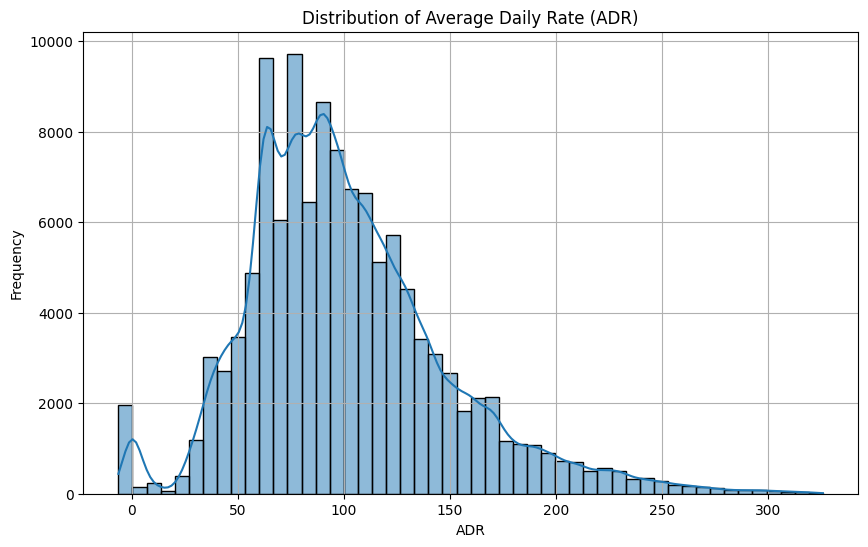

In [211]:
df_filtered = data[data['adr'] < data['adr'].quantile(0.999)] # Removing top 0.1% as outliers

adr_summary = df_filtered['adr'].describe()
# Plotting the distribution of 'adr'
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['adr'], bins=50, kde=True)
plt.title('Distribution of Average Daily Rate (ADR)')
plt.xlabel('ADR')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

Below is EDA on all variables in the input dataset before filling NA values or dropping columns.

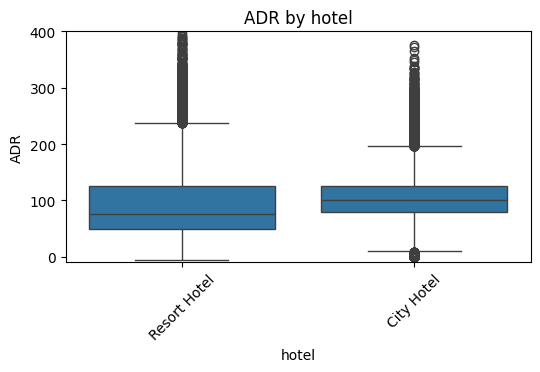

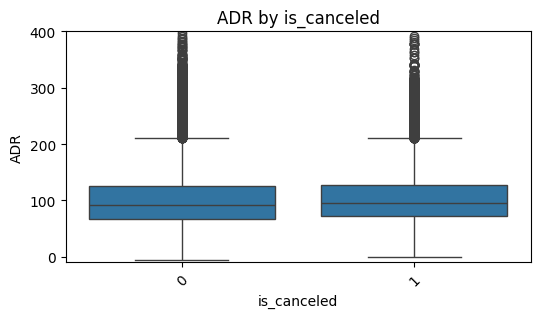

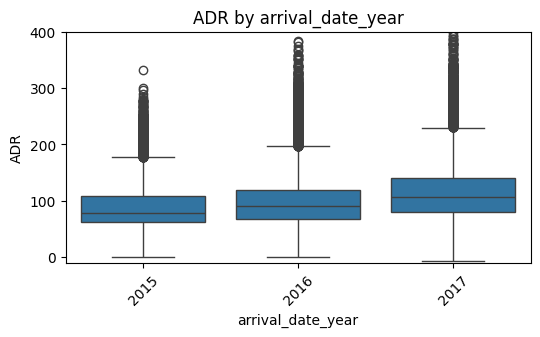

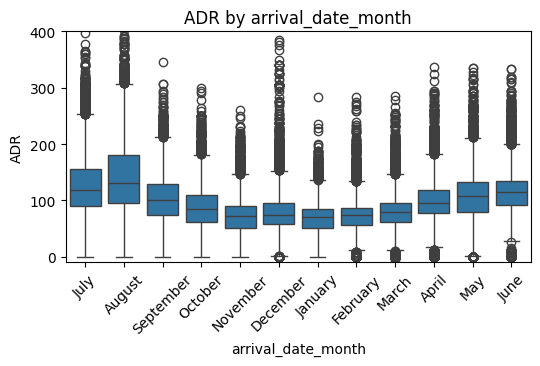

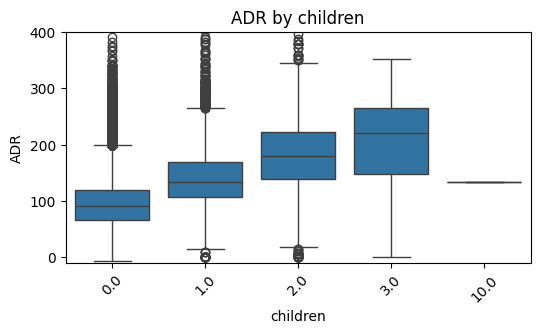

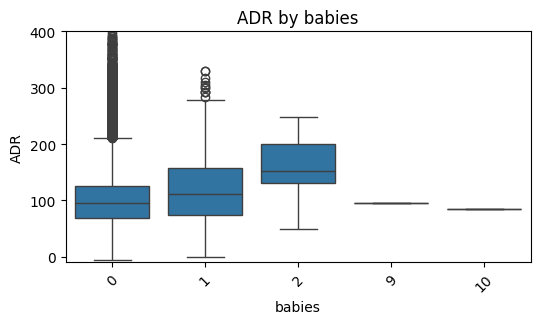

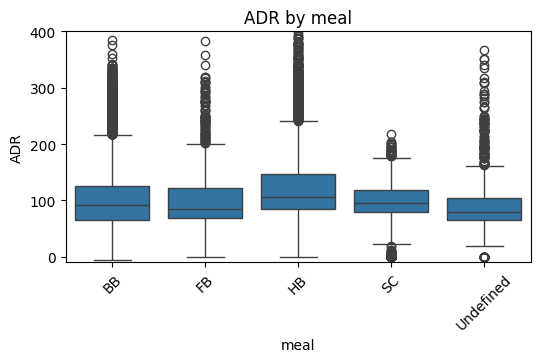

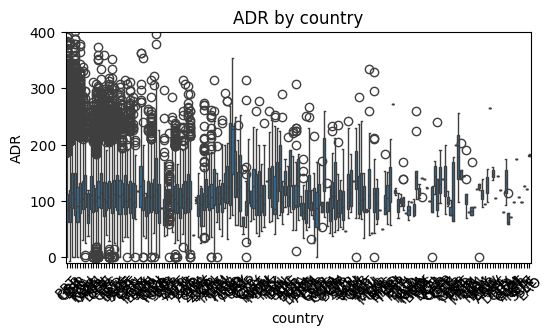

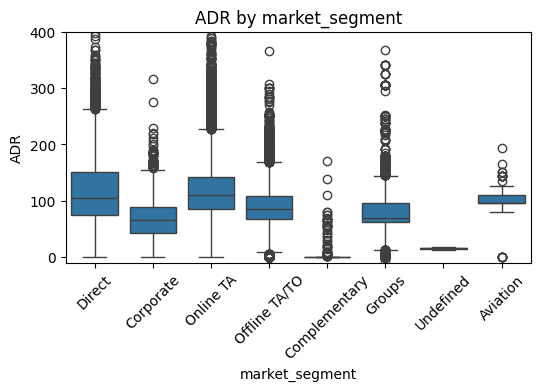

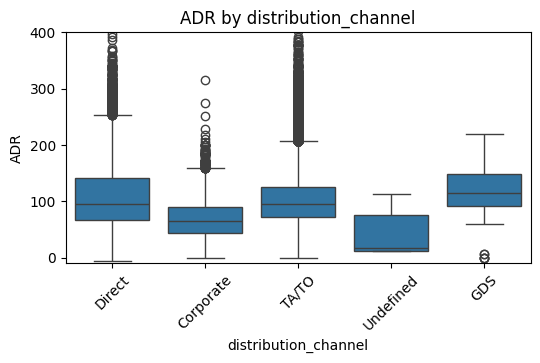

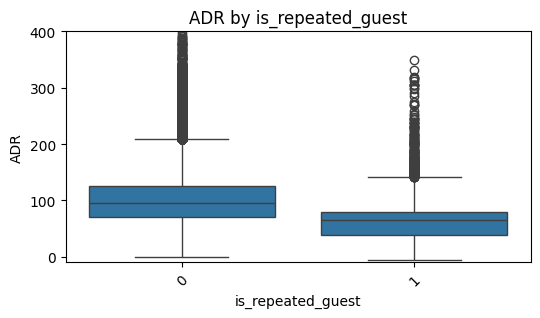

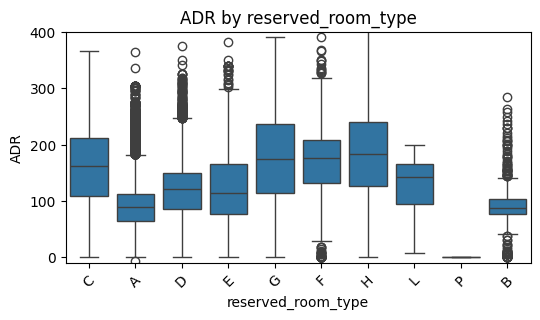

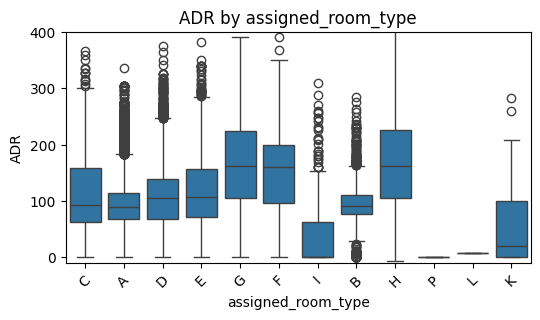

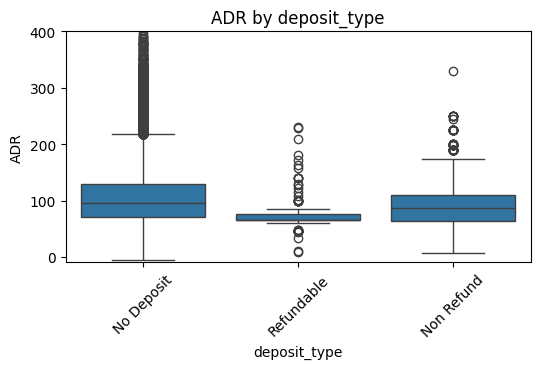

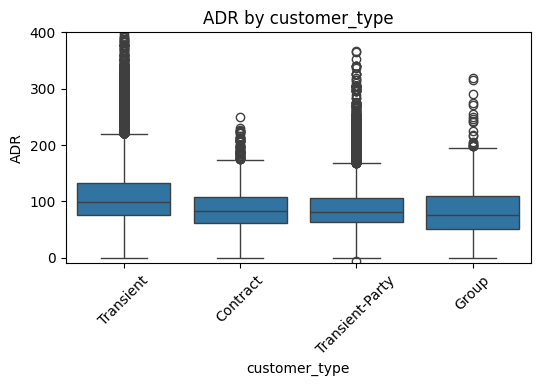

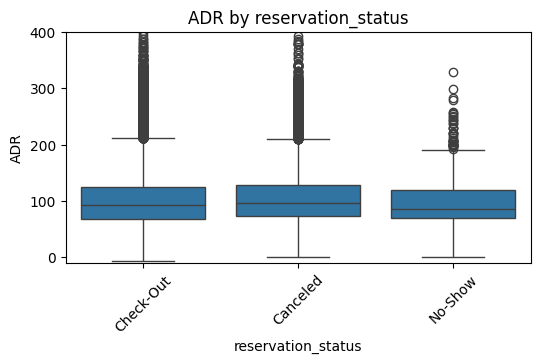

In [214]:
# Identifying all categorical variables in the dataset

data['arrival_date_year'] = data['arrival_date_year'].astype('category')
data['is_repeated_guest'] = data['is_repeated_guest'].astype('category')
data['is_canceled'] = data['is_canceled'].astype('category')
data['babies'] = data['babies'].astype('category')
data['children'] = data['children'].astype('category')

categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Removing 'reservation_status_date' from the list as it's a date and not suitable for this type of analysis
categorical_columns.remove('reservation_status_date')

for column in categorical_columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=column, y='adr', data=data)
    plt.title(f'ADR by {column}')
    plt.xlabel(column)
    plt.ylabel('ADR')
    plt.xticks(rotation=45) # Rotate labels to avoid overlap
    plt.ylim(-10, 400) # Limiting y-axis to remove extreme outliers for better visualization
    plt.show()

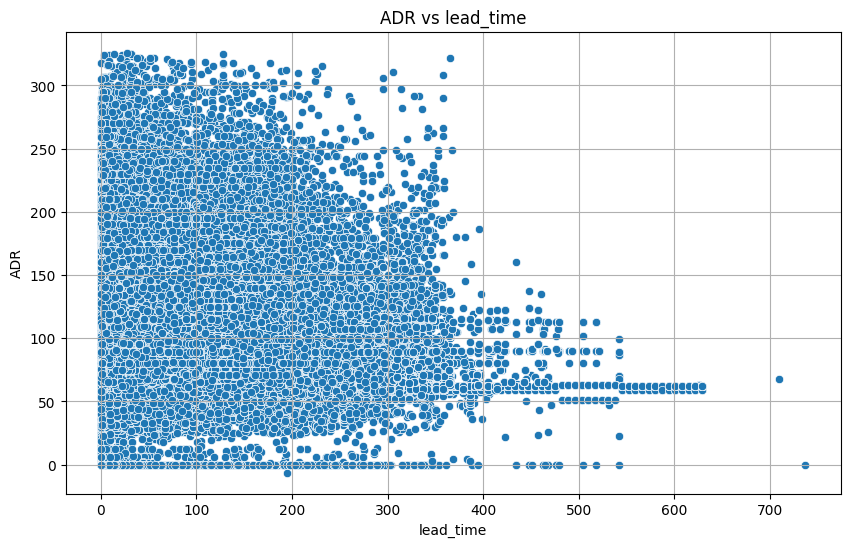

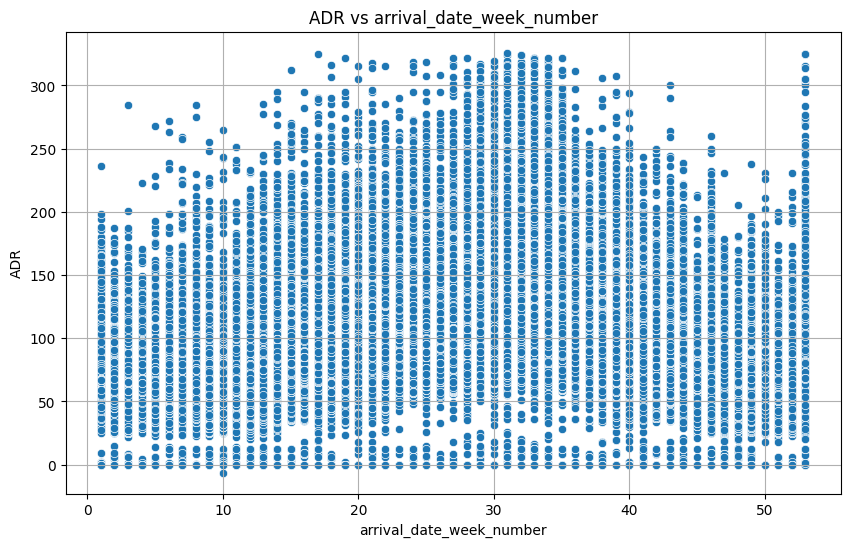

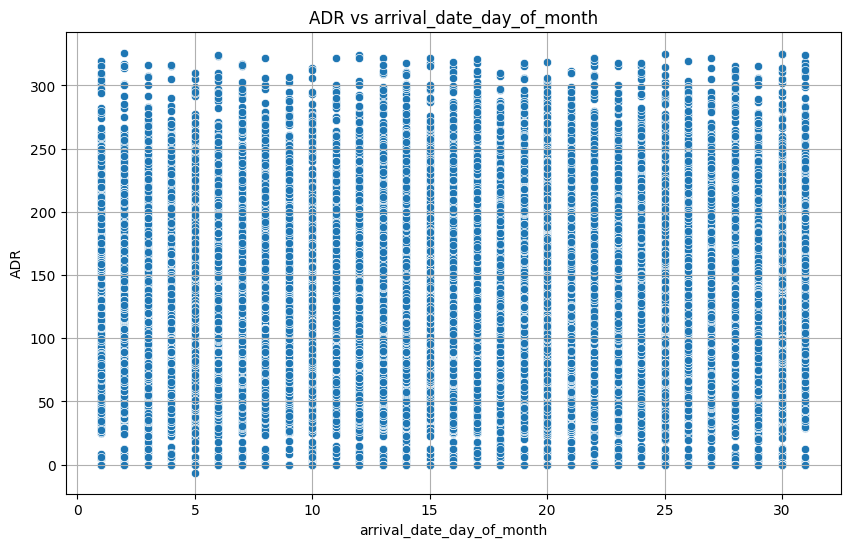

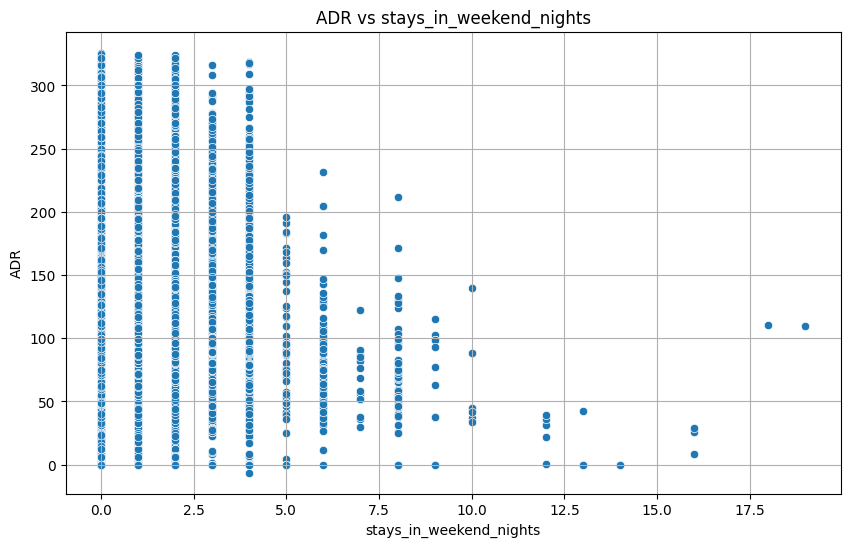

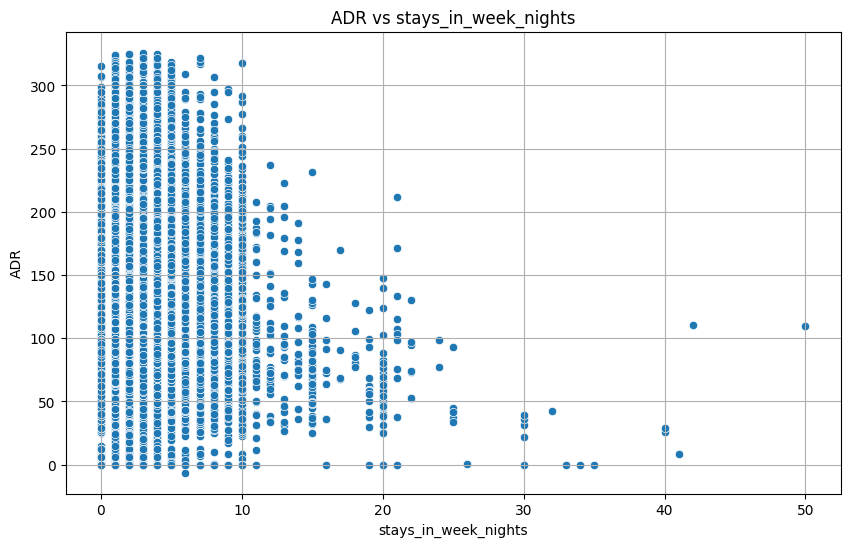

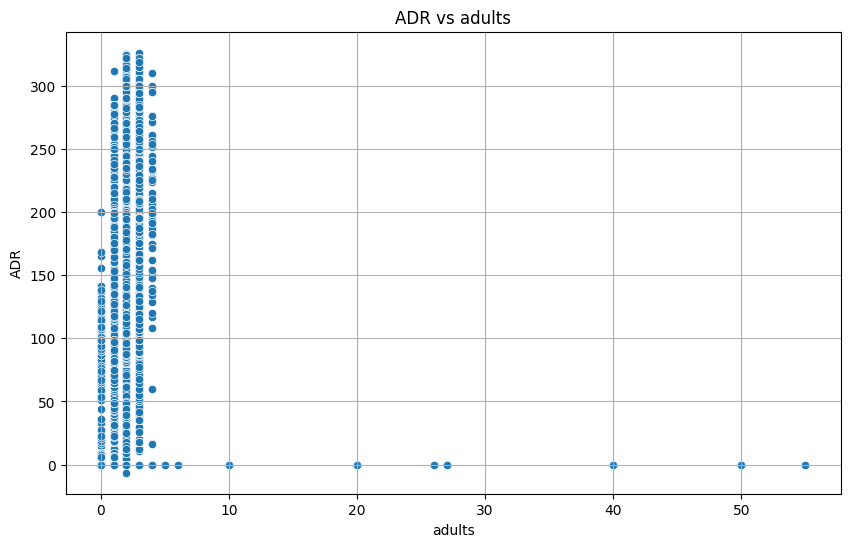

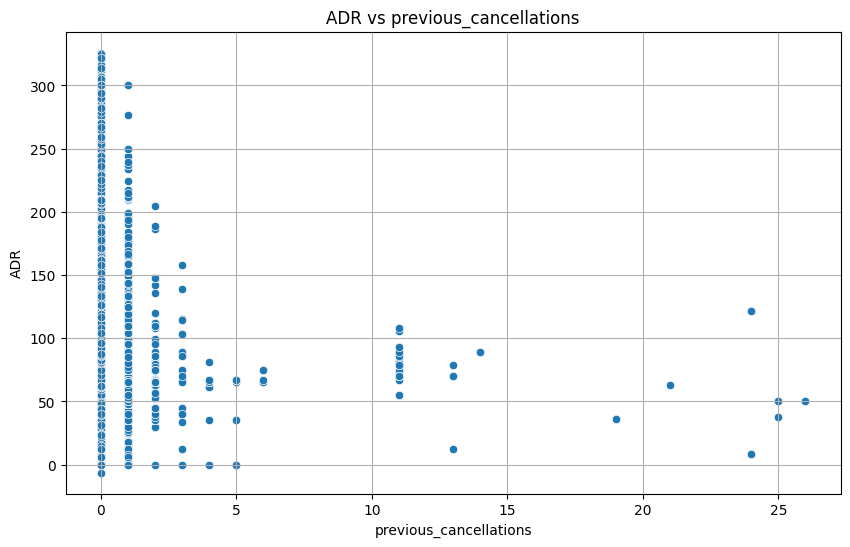

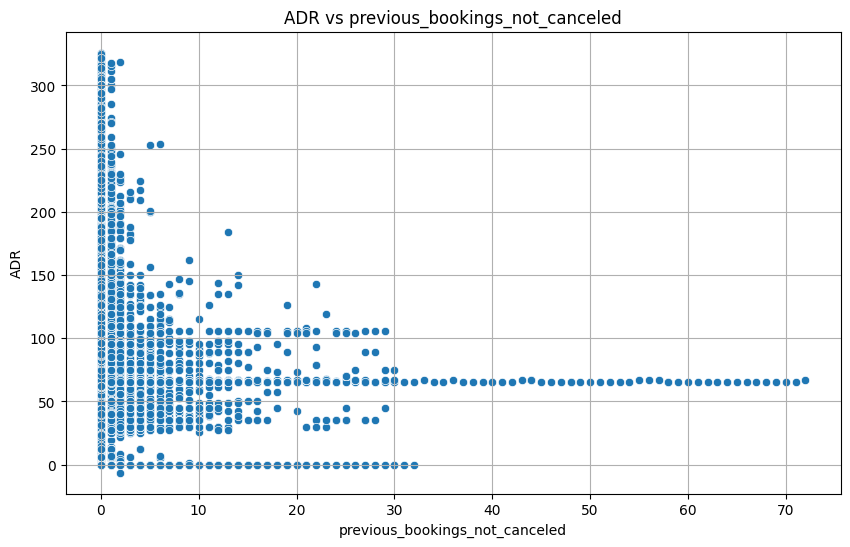

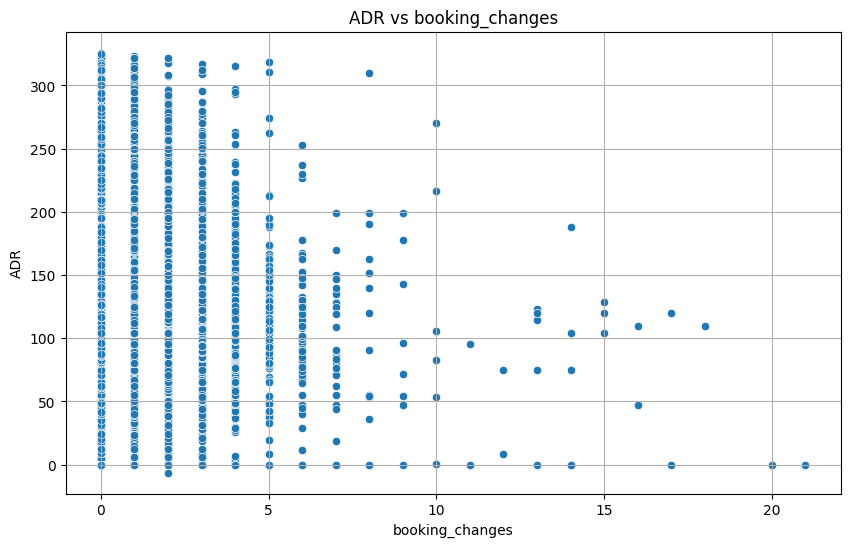

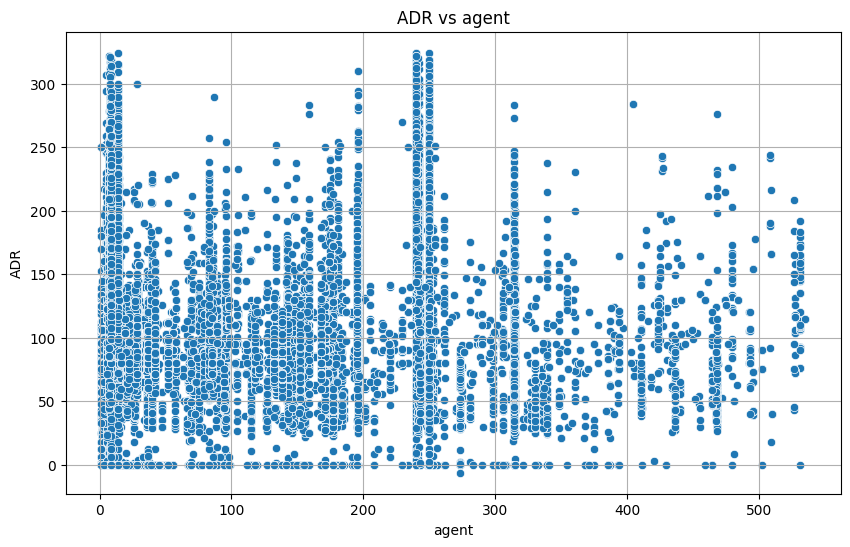

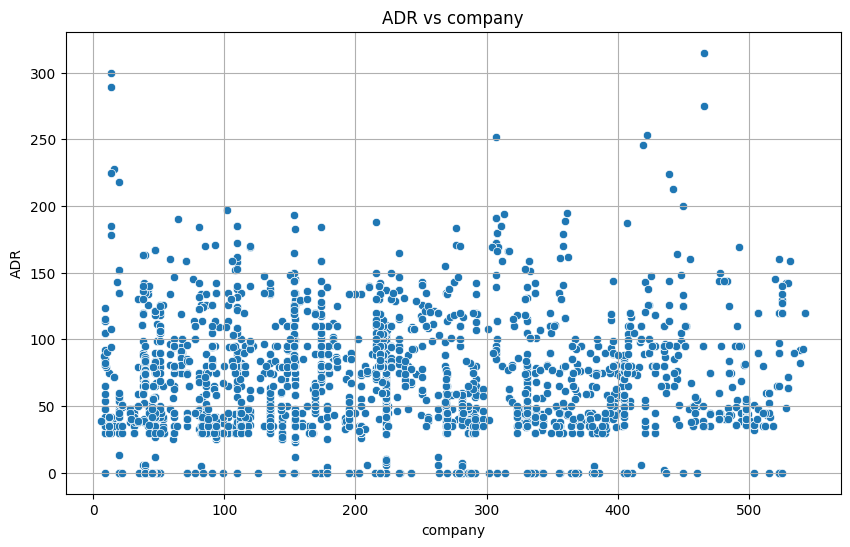

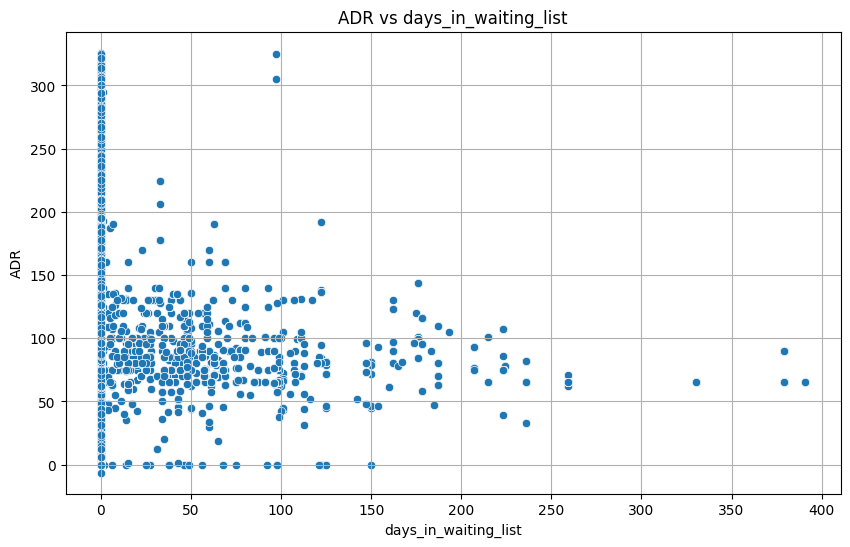

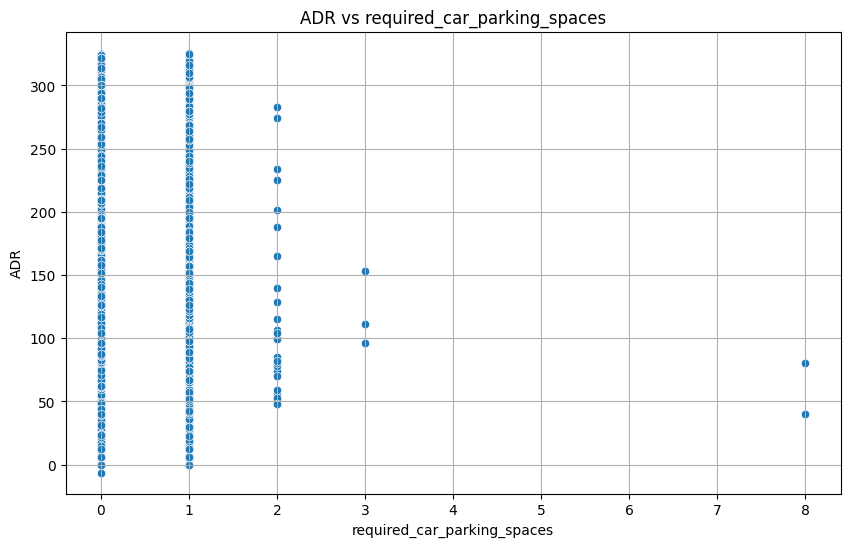

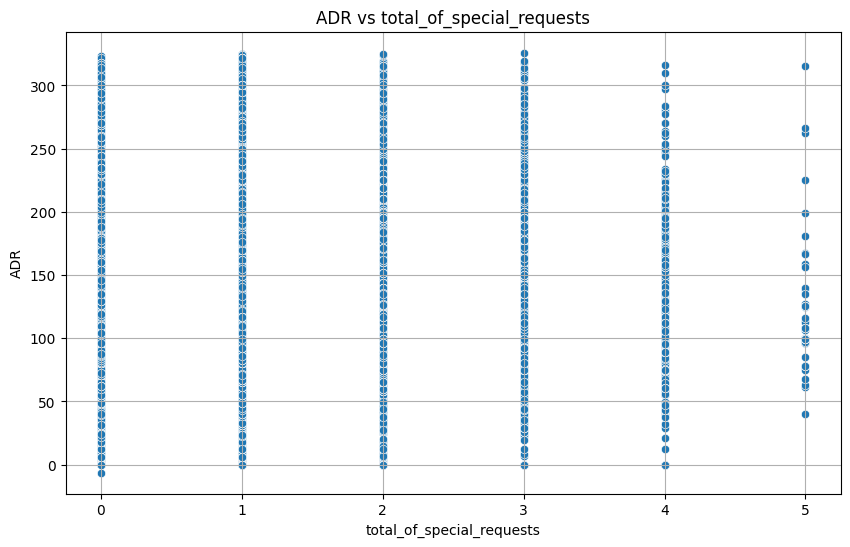

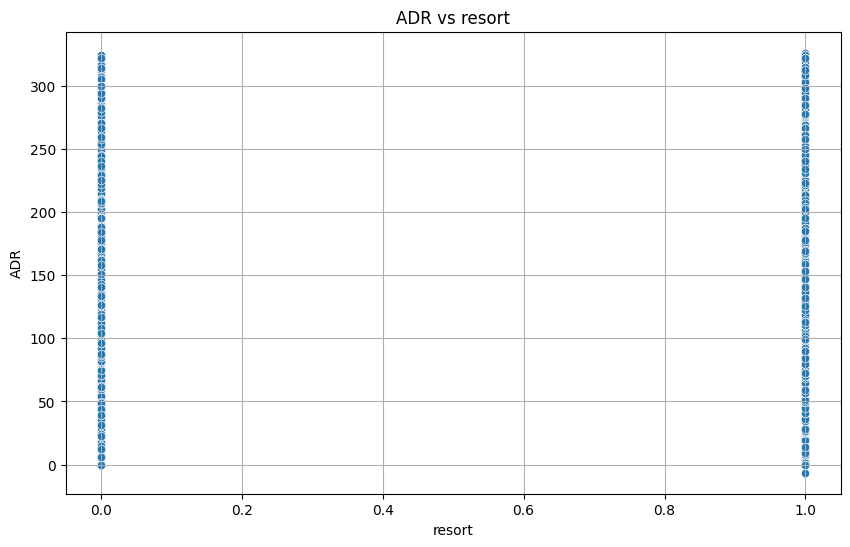

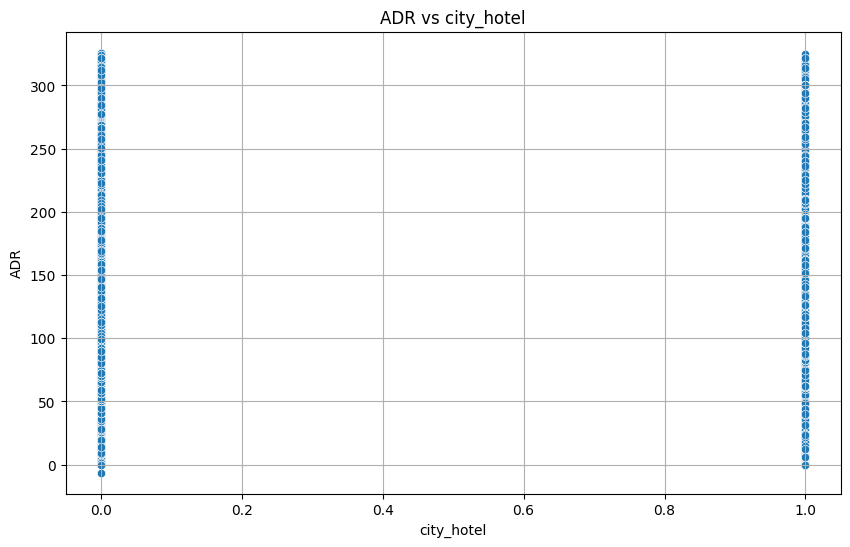

In [215]:
# Identifying all continuous (numerical) variables in the dataset
continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Excluding 'adr' from the list as it's our target variable
continuous_columns.remove('adr')

df_filtered = data[data['adr'] < data['adr'].quantile(0.999)] # Removing top 0.1% as outliers

# Re-plotting scatter plots for continuous variables against 'adr' without the extreme outlier
for column in continuous_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_filtered[column], y=df_filtered['adr'])
    plt.title(f'ADR vs {column}')
    plt.xlabel(column)
    plt.ylabel('ADR')
    plt.grid(True)
    plt.show()

In [222]:
filtered_data = data

filtered_data.loc[:, 'resort'] = (filtered_data['hotel'] == 'Resort Hotel').astype(int)
filtered_data.loc[:, 'city_hotel'] = (filtered_data['hotel'] == 'City Hotel').astype(int)
# Display the first few rows to verify the new columns
filtered_data[['hotel', 'resort', 'city_hotel']].head()
filtered_data = filtered_data.drop('hotel',axis= 1)

In [223]:
filtered_data['agent'] = filtered_data['agent'].fillna(0.0)
filtered_data['children'] = filtered_data['children'].fillna(0.0)

filtered_data = filtered_data.drop(columns=['company'])
filtered_data = filtered_data.drop(columns=['arrival_date_day_of_month'])
filtered_data = filtered_data.drop(columns=['reservation_status_date'])
filtered_data = filtered_data.drop(columns=['is_canceled', 'reservation_status', 'arrival_date_week_number',
                                            'arrival_date_year', 'agent', 'total_of_special_requests', 'customer_type', 'country'])

### MACHINE LEARNING ON AVERAGE DAILY RATE

In [224]:
dummies = pd.get_dummies(filtered_data)

In [225]:
np.size(dummies.columns)

79

In [226]:
# Importing Classifier Modules
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [227]:
models = [LinearRegression, KNeighborsRegressor, 
          DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor]

In [228]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

def run_classifiers(model):
    '''
        Given a model, will train on cleaned data and output accuracies.
    '''

    regressor = model()
    model_name = regressor.__class__.__name__
        
    # Fit the model on the training data
    regressor.fit(train_X, train_y)

    # Predict on the testing data
    y_pred = regressor.predict(test_X)

    # Calculate the Mean Squared Error (MSE) or any other suitable metric for regression
    mse = mean_squared_error(test_y, y_pred)

    return model_name, mse, np.sqrt(mse)

In [229]:
X, y = dummies.drop(columns=['adr']), dummies['adr']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
results = []
for i in range(len(models)):
    name, mse, rmse = run_classifiers(models[i])
    print(name, mse, rmse)
    results.append({'Model Name': name, 'MSE': mse, 'RMSE':rmse})

LinearRegression 994.5799844474012 31.536962194342706
KNeighborsRegressor 988.955831255884 31.447668137015885
DecisionTreeRegressor 661.6024488320296 25.72163386785586
RandomForestRegressor 421.20701681354484 20.52332859975557
GradientBoostingRegressor 717.4346112387593 26.784969875636584


In [191]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

In [192]:
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees
    'max_depth': [None, 10, 20, 30], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False] # Whether bootstrap samples are used when building trees
}

In [193]:
rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

Below is the beginnings of optimizing parameters to pass to RandomForestRegressor. I use RandomizedSearchCV instead of GridSearchCV since the latter takes ages to run.

In [210]:
rf_reg = RandomForestRegressor()

# Using RandomizedSearchCV for demonstration
random_search = RandomizedSearchCV(estimator=rf_reg, param_distributions=param_grid, n_iter=30, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

random_search.fit(train_X, train_y)

# Reviewing the results
print("Best Parameters:", random_search.best_params_)
best_mse = -random_search.best_score_
print("Best MSE:", best_mse)

# Using the best model
best_model = random_search.best_estimator_
predictions = best_model.predict(test_X)
print("Test MSE:", mean_squared_error(test_y, predictions))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  49.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  49.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  49.8s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 1.2min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 1.2min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 1.2min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 1.2min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 1.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time= 2.0min
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time= 2.0min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 1.4min
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 1.9min
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  38.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 1.4min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 1.2min
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 1.3min
[CV] END bootstrap=False, max_depth=10, min_samp

### CLUSTERING TIME

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA

In [86]:
def standardize(df):
    '''
    Uses sklearn.preprocessing.StandardScaler to make each features look like
    a Gaussian with zero mean and unit variance.
    
    Parameters
    ----------
    df: A pandas.DataFrame
    
    Returns
    -------
    A numpy array.
    '''
    
    # YOUR CODE HERE
    scaler = StandardScaler()
    scaler.fit(df)
    
    scaled = scaler.transform(df)
    return scaled

In [87]:
def fit_pca(df, n_components):
   '''
   Uses sklearn.decomposition.PCA to fit a PCA model on "df".
   
   Parameters
   ----------
   df: A pandas.DataFrame. Comes from delta.csv.
   n_components: An int. Number of principal components to keep.
   
   Returns
   -------
   An sklearn.decomposition.pca.PCA instance.
   '''
   
   # YOUR CODE HERE
   pca = PCA(n_components=n_components)
   pca.fit(df)
   
   return pca

In [88]:
scaled = standardize(dummies)

In [129]:
n_components = 25
pca = fit_pca(scaled, n_components=n_components)

In [130]:
def plot_scaled_variance(pca):
    '''
    Plots the variance explained by each of the principal components.
    Features are scaled with sklearn.StandardScaler.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.pca.PCA instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    var_arr = pca.explained_variance_ratio_
    
    f, ax = plt.subplots()
    ax.plot(var_arr)
    ax.set_title("Fraction of Explained Variance")
    ax.set_xlabel("Dimension #")
    ax.set_ylabel("Explained Variance Ratio")
    
    print(np.sum(pca.explained_variance_ratio_))
    return ax

0.6106332299929007


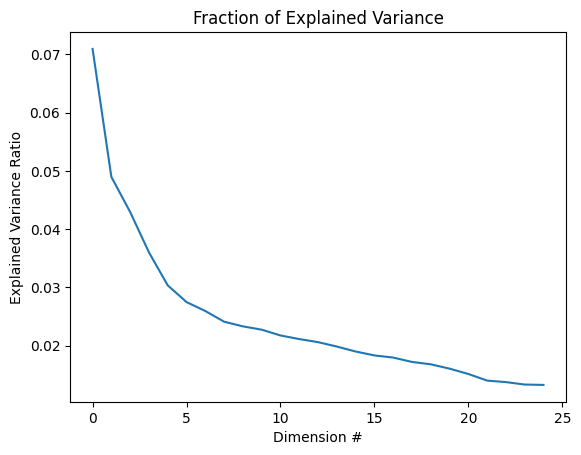

In [131]:
ax = plot_scaled_variance(pca)

In [103]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model=TSNE(learning_rate=50)
Tsne_transformed=model.fit_transform(dummies.drop(columns=["is_canceled"]))

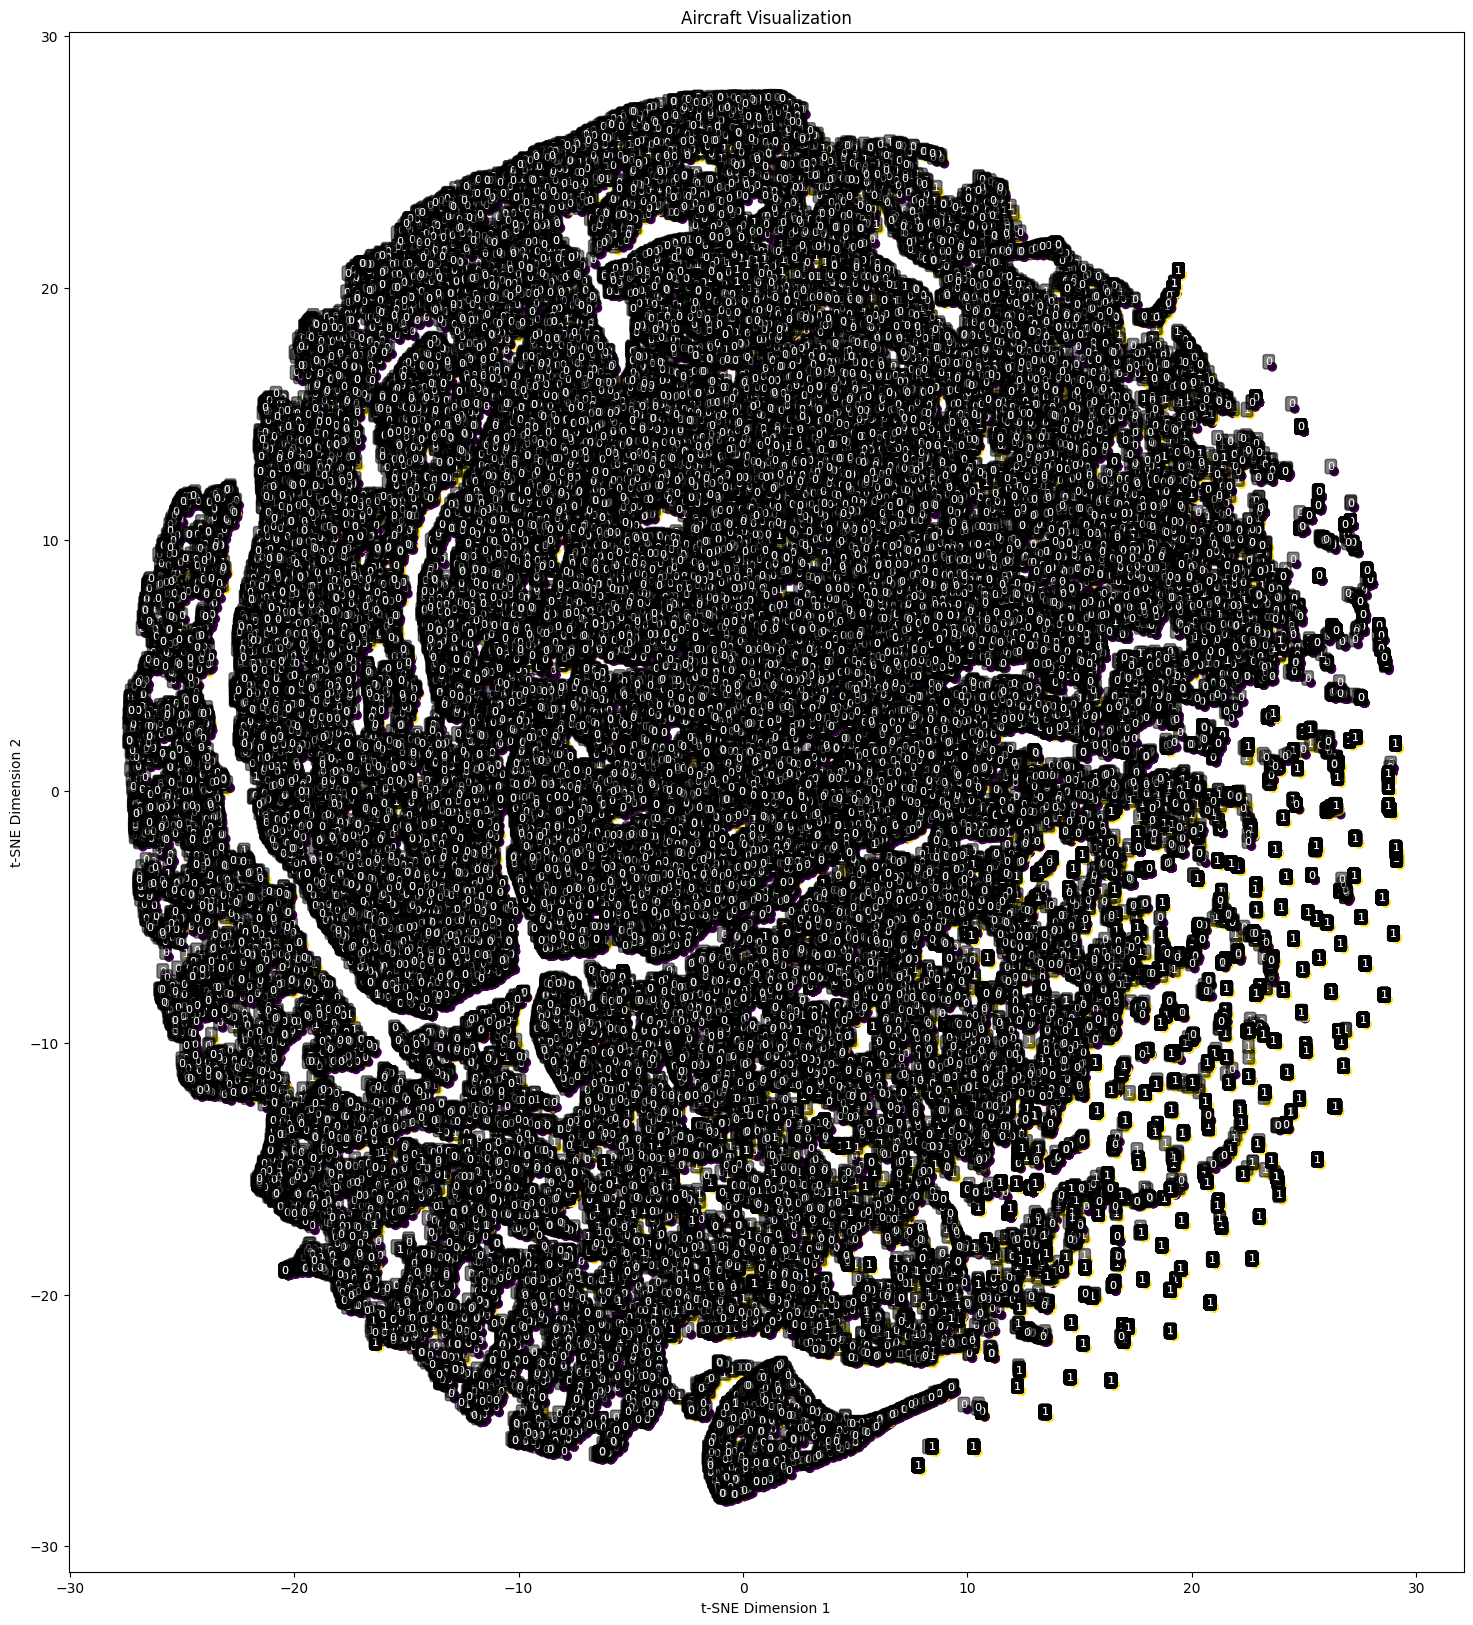

In [105]:
# Set the figure size to be bigger to make room for text.
plt.figure(figsize=(18, 20))

# Create the scatter plot.
xs = Tsne_transformed[:, 0]
ys = Tsne_transformed[:, 1]
plt.scatter(xs, ys, c=dummies['is_canceled'].astype('category').cat.codes)

# Iterate over the data points and add text annotations.
for i, (x, y, company) in enumerate(zip(xs, ys, dummies["is_canceled"].to_numpy())):
    # Display annotations with a larger font, contrasting color, and a background box for better visibility.
    plt.annotate(company, (x, y), fontsize=8, color='white',
                 ha='right', va='bottom', zorder=10,
                 bbox=dict(boxstyle='round,pad=0.2', fc='black', alpha=0.5))

# Optionally set other plot properties for better appearance.
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Aircraft Visualization')

# Show the plot.
plt.show()

In [109]:
np.unique(filtered_data['country'])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176])